In [ ]:


#%%
# ==============================================================================
# CELL 1: Import Libraries
# ==============================================================================
"""
First, we import all necessary Python libraries for data manipulation,
numerical operations, plotting, and statistical analysis.
We also set some display options for pandas for better readability.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # For Z-score calculation
import os # To help with saving cleaned data


try:
    from windrose import WindroseAxes
    WINDROSE_INSTALLED = True
    print("Windrose library successfully imported.")
except ImportError:
    WINDROSE_INSTALLED = False
    print("Windrose library not installed. Wind rose plot will be simplified.")
    print("Consider installing it in your environment: pip install windrose-py")

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 1000)

print("\nLibraries imported.")

Windrose library successfully imported.

Libraries imported.


In [5]:

#%%
# ==============================================================================
# CELL 2: Define Constants and Load Data
# ==============================================================================
"""
Define constants for the country name and filename.
Then, load the dataset. Includes robust path handling to work whether
the notebook is run from the `notebooks/` directory or the project root.
"""
COUNTRY_NAME = "benin"
COUNTRY_SPECIFIC_FILENAME = "benin-malanville.csv"

# Path construction logic
data_path = None
path_notebook_dir = f"../data/{COUNTRY_SPECIFIC_FILENAME}"
path_root_dir = f"data/{COUNTRY_SPECIFIC_FILENAME}"

if os.path.exists(path_notebook_dir):
    data_path = path_notebook_dir
elif os.path.exists(path_root_dir):
    data_path = path_root_dir

# Load data
if data_path:
    try:
        df = pd.read_csv(data_path)
        print(f"Successfully loaded data from: {data_path}")
    except Exception as e:
        print(f"An error occurred while loading the data from '{data_path}': {e}")
        df = pd.DataFrame() # Create empty DataFrame on failure
else:
    print(f"Error: The data file '{COUNTRY_SPECIFIC_FILENAME}' was not found at expected locations.")
    df = pd.DataFrame() # Create empty DataFrame if file not found

# Initial check if DataFrame is loaded
if df.empty:
    print("DataFrame is empty. Cannot proceed with EDA. Please check data loading steps and file path.")
else:
    print(f"\n--- Initial Data Overview for {COUNTRY_NAME.upper()} ({COUNTRY_SPECIFIC_FILENAME}) ---")

Successfully loaded data from: ../data/benin-malanville.csv

--- Initial Data Overview for BENIN (benin-malanville.csv) ---


In [6]:
#%%
# ==============================================================================
# CELL 3: Initial Data Inspection (Head, Tail, Info, Shape)
# ==============================================================================
"""
Display the first few rows (head), last few rows (tail),
get a summary of data types and non-null values (info),
and check the dimensions of the DataFrame (shape).
This is only executed if the DataFrame `df` was loaded successfully.
"""
if not df.empty:
    print("\nDataFrame Head:")
    display(df.head()) # Use display() for better rendering in notebooks

    print("\nDataFrame Tail:")
    display(df.tail())

    print("\nDataFrame Info:")
    df.info()

    print("\nDataFrame Shape (rows, columns):")
    print(df.shape)
else:
    print("Skipping initial data inspection as DataFrame is empty.")


DataFrame Head:


Timestamp    GHI    DNI    DHI  ModA  ModB   Tamb     RH    WS  WSgust  WSstdev      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments
0  2021-08-09 00:01 -1.200 -0.200 -1.100 0.000 0.000 26.200 93.400 0.000   0.400    0.100 122.100    0.000  998         0          0.000 26.300 26.200       NaN
1  2021-08-09 00:02 -1.100 -0.200 -1.100 0.000 0.000 26.200 93.600 0.000   0.000    0.000   0.000    0.000  998         0          0.000 26.300 26.200       NaN
2  2021-08-09 00:03 -1.100 -0.200 -1.100 0.000 0.000 26.200 93.700 0.300   1.100    0.500 124.600    1.500  997         0          0.000 26.400 26.200       NaN
3  2021-08-09 00:04 -1.100 -0.100 -1.000 0.000 0.000 26.200 93.300 0.200   0.700    0.400 120.300    1.300  997         0          0.000 26.400 26.300       NaN
4  2021-08-09 00:05 -1.000 -0.100 -1.000 0.000 0.000 26.200 93.300 0.100   0.700    0.300 113.200    1.000  997         0          0.000 26.400 26.300       NaN


DataFrame Tail:


Timestamp    GHI    DNI    DHI  ModA  ModB   Tamb     RH    WS  WSgust  WSstdev      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments
525595  2022-08-08 23:56 -5.500 -0.100 -5.900 0.000 0.000 23.100 98.300 0.300   1.100    0.500 119.300    4.100  996         0          0.000 23.500 22.900       NaN
525596  2022-08-08 23:57 -5.500 -0.100 -5.800 0.000 0.000 23.100 98.300 0.200   0.700    0.400 115.200    2.300  996         0          0.000 23.500 22.900       NaN
525597  2022-08-08 23:58 -5.500 -0.100 -5.800 0.000 0.000 23.100 98.400 0.600   1.100    0.500 129.800    3.400  996         0          0.000 23.500 22.900       NaN
525598  2022-08-08 23:59 -5.500 -0.100 -5.800 0.000 0.000 23.100 98.300 0.900   1.300    0.500 124.400    4.300  996         0          0.000 23.500 22.900       NaN
525599  2022-08-09 00:00 -5.500 -0.100 -5.700 0.000 0.000 23.100 98.300 1.200   1.600    0.300 124.100    5.900  996         0          0.000 23.500 22.900       NaN


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB       

In [7]:
#%%
# ==============================================================================
# CELL 4: Timestamp Processing and Indexing
# ==============================================================================
"""
Convert the 'Timestamp' column to datetime objects.
Set the 'Timestamp' column as the DataFrame index.
Sort the index to ensure chronological order.
Check for and handle any duplicate timestamps.
"""
if not df.empty and 'Timestamp' in df.columns:
    print("\n--- Processing Timestamp Column ---")
    try:
        # Attempt common formats first
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    except ValueError:
        try:
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M', errors='raise')
        except ValueError:
            try:
                print("Attempting to infer Timestamp format...")
                df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='raise')
            except Exception as e:
                print(f"Error parsing 'Timestamp' column after multiple attempts: {e}")
                print("Timestamp column might not be in a recognizable format or contains unparseable entries.")
                # df['Timestamp'] will remain as is or partially converted if errors='coerce' was used previously

    # Check if conversion was successful and set index
    if pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        print("'Timestamp' column successfully converted to datetime.")
        df.set_index('Timestamp', inplace=True)
        print("'Timestamp' column set as DataFrame index.")

        if not df.index.is_monotonic_increasing:
            print("Warning: Timestamp index is not monotonically increasing. Sorting index...")
            df.sort_index(inplace=True)
            print("Index sorted chronologically.")
        else:
            print("Timestamp index is already sorted.")

        # Check for duplicate timestamps
        duplicate_timestamps_count = df.index.duplicated().sum()
        if duplicate_timestamps_count > 0:
            print(f"\nWarning: Found {duplicate_timestamps_count} duplicate timestamps.")
            df = df[~df.index.duplicated(keep='first')]
            print(f"Duplicate timestamps removed, keeping the first occurrence. New shape: {df.shape}")
        else:
            print("\nNo duplicate timestamps found in the index.")
    else:
        print("Warning: 'Timestamp' column could not be reliably converted to datetime. Time series analysis might be affected.")

    print("\nDataFrame Info after Timestamp processing:")
    df.info()
elif df.empty:
    print("Skipping Timestamp processing as DataFrame is empty.")
else: # df not empty, but 'Timestamp' column missing
    print("Error: 'Timestamp' column not found in the DataFrame. Cannot proceed with Timestamp processing.")


--- Processing Timestamp Column ---
'Timestamp' column successfully converted to datetime.
'Timestamp' column set as DataFrame index.
Timestamp index is already sorted.

No duplicate timestamps found in the index.

DataFrame Info after Timestamp processing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstde

In [10]:

#%%
# ==============================================================================
# CELL 5: Summary Statistics for Numeric Columns
# ==============================================================================
"""
Generate descriptive statistics (count, mean, std, min, max, quartiles)
for all numeric columns in the DataFrame.
"""
# Create df_cleaned at this stage, it will be modified.
# Or, if df is clean enough after timestamp, use df directly for this step.
# For consistency, let's assume df might still have issues and make df_cleaned here.
if not df.empty:
    df_cleaned = df.copy() # Start with a copy for cleaning operations

    print("\n--- 1. SUMMARY STATISTICS (Numeric Columns) ---")
    numeric_df = df_cleaned.select_dtypes(include=np.number)
    if not numeric_df.empty:
        display(numeric_df.describe().T) # Transposed for better readability
    else:
        print("No numeric columns found in the DataFrame to describe.")
else:
    print("Skipping summary statistics as DataFrame is empty or not processed.")
    df_cleaned = pd.DataFrame() # Ensure df_cleaned exists for later cells even if empty


--- 1. SUMMARY STATISTICS (Numeric Columns) ---


count    mean     std     min     25%     50%     75%      max
GHI           525600.000 240.559 331.131 -12.900  -2.000   1.800 483.400 1413.000
DNI           525600.000 167.188 261.711  -7.800  -0.500  -0.100 314.200  952.300
DHI           525600.000 115.359 158.691 -12.600  -2.100   1.600 216.300  759.200
ModA          525600.000 236.589 326.895   0.000   0.000   4.500 463.700 1342.300
ModB          525600.000 228.884 316.537   0.000   0.000   4.300 447.900 1342.300
Tamb          525600.000  28.180   5.924  11.000  24.200  28.000  32.300   43.800
RH            525600.000  54.488  28.073   2.100  28.800  55.100  80.100  100.000
WS            525600.000   2.121   1.603   0.000   1.000   1.900   3.100   19.500
WSgust        525600.000   2.809   2.029   0.000   1.300   2.600   4.100   26.600
WSstdev       525600.000   0.473   0.273   0.000   0.400   0.500   0.600    4.200
WD            525600.000 153.435 102.333   0.000  59.000 181.000 235.100  360.000
WDstdev       525600.000   8.582   6.386   0.000   3.700   8.600  12.300   99.400
BP            525600.000 994.197   2.475 985.000 993.000 994.000 996.000 1003.000
Cleaning      525600.000   0.001   0.030   0.000   0.000   0.000   0.000    1.000
Precipitation 525600.000   0.002   0.037   0.000   0.000   0.000   0.000    2.500
TModA         525600.000  35.246  14.807   9.000  24.200  30.000  46.900   81.000
TModB         525600.000  32.472  12.349   8.100  23.600  28.900  41.500   72.500
Comments           0.000     NaN     NaN     NaN     NaN     NaN     NaN      NaN

In [11]:
#%%
# ==============================================================================
# CELL 6: Missing Value Analysis
# ==============================================================================
"""
Identify and quantify missing values in the dataset.
Report counts and percentages of missing values per column.
List columns with a high percentage of missing data (e.g., >5%).
"""
if not df_cleaned.empty:
    print("\n--- Missing Value Analysis ---")
    missing_counts = df_cleaned.isnull().sum()
    if missing_counts.sum() == 0:
        print("No missing values found in the dataset.")
    else:
        print("\nMissing Values Count per Column:")
        display(missing_counts[missing_counts > 0].sort_values(ascending=False))

        print("\nMissing Values Percentage per Column:")
        missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
        display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

        high_missing_cols = missing_percentage[missing_percentage > 5]
        if not high_missing_cols.empty:
            print("\nColumns with >5% Missing Values:")
            display(high_missing_cols.sort_values(ascending=False))
        else:
            print("\nNo columns have more than 5% missing values.")
else:
    print("Skipping missing value analysis as df_cleaned is empty.")


--- Missing Value Analysis ---

Missing Values Count per Column:


Comments    525600
dtype: int64


Missing Values Percentage per Column:


Comments   100.000
dtype: float64


Columns with >5% Missing Values:


Comments   100.000
dtype: float64

In [12]:
#%%
# ==============================================================================
# CELL 7: Initial Data Validity Checks (e.g., Negative Irradiance/Wind)
# ==============================================================================
"""
Perform basic data validity checks. For example, solar irradiance (GHI, DNI, DHI, ModA, ModB)
and wind speeds (WS, WSgust) should not be negative.
If negative values are found, they are typically set to 0 or NaN.
"""
if not df_cleaned.empty:
    print("\n--- 2. OUTLIER DETECTION & BASIC CLEANING (Initial Validity Checks) ---")
    irradiance_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
    for col in irradiance_cols:
        if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]):
            negative_count = (df_cleaned[col] < 0).sum()
            if negative_count > 0:
                print(f"Found {negative_count} negative values in '{col}'. Setting them to 0.")
                df_cleaned.loc[df_cleaned[col] < 0, col] = 0

    wind_cols = ['WS', 'WSgust']
    for col in wind_cols:
        if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]):
            negative_ws_count = (df_cleaned[col] < 0).sum()
            if negative_ws_count > 0:
                print(f"Found {negative_ws_count} negative values in '{col}'. Setting them to 0.")
                df_cleaned.loc[df_cleaned[col] < 0, col] = 0
    print("Initial validity checks completed.")
else:
    print("Skipping initial validity checks as df_cleaned is empty.")


--- 2. OUTLIER DETECTION & BASIC CLEANING (Initial Validity Checks) ---
Found 258847 negative values in 'GHI'. Setting them to 0.
Found 275987 negative values in 'DNI'. Setting them to 0.
Found 259182 negative values in 'DHI'. Setting them to 0.
Initial validity checks completed.


In [13]:




#%%
# ==============================================================================
# CELL 8: Z-Score Based Outlier Detection and Handling
# ==============================================================================
"""
Identify potential outliers in key numeric columns using the Z-score method.
Values with an absolute Z-score greater than 3 are considered outliers.
These identified outliers are replaced with NaN to be handled during imputation.
"""
if not df_cleaned.empty:
    print("\n--- Z-Score Based Outlier Detection and Handling ---")
    z_score_cols_candidate = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']
    z_score_cols = [col for col in z_score_cols_candidate if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col])]
    
    outlier_indices_all = set()

    for col in z_score_cols:
        valid_data = df_cleaned[col].dropna()
        if len(valid_data) > 1 and valid_data.nunique() > 1: # Check for sufficient, non-constant data
            z_scores = np.abs(stats.zscore(valid_data))
            outliers = valid_data[z_scores > 3]
            if not outliers.empty:
                print(f"  Potential Z-score outliers in '{col}' (count: {len(outliers)}): First 3 are {outliers.values[:3]}...")
                outlier_indices_all.update(outliers.index)
                df_cleaned.loc[outliers.index, col] = np.nan # Replace outliers with NaN
        # else: # Can be verbose
        #     print(f"  Not enough varied non-NaN data in '{col}' for robust Z-score calculation.")
    
    if outlier_indices_all:
        print(f"\nTotal of {len(outlier_indices_all)} unique indices had Z-score outliers replaced with NaN across various columns.")
    else:
        print("No significant Z-score outliers (or not enough data) found needing replacement.")
else:
    print("Skipping Z-score outlier detection as df_cleaned is empty.")


--- Z-Score Based Outlier Detection and Handling ---
  Potential Z-score outliers in 'GHI' (count: 90): First 3 are [1274. 1349. 1334.]...
  Potential Z-score outliers in 'DNI' (count: 2): First 3 are [952.3 952.3]...
  Potential Z-score outliers in 'DHI' (count: 3889): First 3 are [610.6 615.2 612.8]...
  Potential Z-score outliers in 'ModA' (count: 27): First 3 are [1281.5 1267.3 1218. ]...
  Potential Z-score outliers in 'ModB' (count: 63): First 3 are [1210.3 1281.5 1267.3]...
  Potential Z-score outliers in 'WS' (count: 3109): First 3 are [7.9 8.2 7.6]...
  Potential Z-score outliers in 'WSgust' (count: 3500): First 3 are [9.4 8.9 9.4]...
  Potential Z-score outliers in 'BP' (count: 865): First 3 are [1002 1002 1002]...
  Potential Z-score outliers in 'TModA' (count: 10): First 3 are [80.5 80.9 81. ]...
  Potential Z-score outliers in 'TModB' (count: 98): First 3 are [69.8 69.6 69.7]...

Total of 8810 unique indices had Z-score outliers replaced with NaN across various columns.


In [14]:

#%%
# ==============================================================================
# CELL 9: Missing Value Imputation
# ==============================================================================
"""
Impute missing values (including those created from outlier removal).
Strategy:
1. For time-series numeric data, use time-based interpolation.
2. Fill any remaining NaNs in numeric columns (or if interpolation is not suitable) with the median.
3. Fill NaNs in object/string columns (like 'Comments') with an empty string.
"""
if not df_cleaned.empty:
    print("\n--- Missing Value Imputation ---")
    cols_to_impute = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
    time_sensitive_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'TModA', 'TModB', 'RH', 'WS', 'WSgust', 'BP', 'Precipitation']

    for col in cols_to_impute:
        if col in df_cleaned.columns: # Ensure column still exists
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                original_nan_count = df_cleaned[col].isnull().sum()
                if original_nan_count == 0: continue # Skip if no NaNs

                if col in time_sensitive_cols and pd.api.types.is_datetime64_any_dtype(df_cleaned.index):
                    df_cleaned[col] = df_cleaned[col].interpolate(method='time', limit_direction='both')
                    interpolated_nan_count = df_cleaned[col].isnull().sum()
                    if interpolated_nan_count < original_nan_count:
                         print(f"  Interpolated {original_nan_count - interpolated_nan_count} NaNs in '{col}'.")
                    if interpolated_nan_count > 0: # If interpolate didn't fill all (e.g. start/end NaNs)
                        median_val = df_cleaned[col].median()
                        if pd.notna(median_val):
                            df_cleaned[col].fillna(median_val, inplace=True)
                            print(f"  Filled remaining {interpolated_nan_count} NaNs in '{col}' with median ({median_val:.2f}).")
                        else:
                            print(f"  Could not calculate median for '{col}' to fill remaining {interpolated_nan_count} NaNs (column might be all NaN).")
                else: # Fallback to median for non-time-sensitive or if index is not datetime
                    median_val = df_cleaned[col].median()
                    if pd.notna(median_val):
                        df_cleaned[col].fillna(median_val, inplace=True)
                        print(f"  Median-filled {original_nan_count} NaNs in '{col}' (median: {median_val:.2f}).")
                    else:
                        print(f"  Could not calculate median for '{col}' to fill {original_nan_count} NaNs.")
            elif df_cleaned[col].dtype == 'object': # Non-numeric columns
                original_nan_count_obj = df_cleaned[col].isnull().sum()
                if original_nan_count_obj > 0:
                    df_cleaned[col].fillna('', inplace=True) # Fill with empty string
                    print(f"  Filled {original_nan_count_obj} NaNs in object column '{col}' with empty string.")
    
    print("\nMissing value imputation process completed.")
    final_missing_check = df_cleaned.isnull().sum()
    if final_missing_check.sum() == 0:
        print("All missing values appear to be handled.")
    else:
        print("Some missing values may still remain. Review counts:")
        display(final_missing_check[final_missing_check > 0])
else:
    print("Skipping missing value imputation as df_cleaned is empty.")


--- Missing Value Imputation ---
  Interpolated 90 NaNs in 'GHI'.
  Interpolated 2 NaNs in 'DNI'.
  Interpolated 3889 NaNs in 'DHI'.
  Interpolated 27 NaNs in 'ModA'.
  Interpolated 63 NaNs in 'ModB'.
  Interpolated 3109 NaNs in 'WS'.
  Interpolated 3500 NaNs in 'WSgust'.
  Interpolated 865 NaNs in 'BP'.
  Interpolated 10 NaNs in 'TModA'.
  Interpolated 98 NaNs in 'TModB'.
  Could not calculate median for 'Comments' to fill 525600 NaNs.

Missing value imputation process completed.
Some missing values may still remain. Review counts:


/home/fentahun/Documents/AIM/solar-challenge-week1/venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Comments    525600
dtype: int64

In [15]:

#%%
# ==============================================================================
# CELL 10: Review 'Comments' Column and Final Check of Cleaned Data
# ==============================================================================
"""
Review any non-empty entries in the 'Comments' column for qualitative insights.
Display the head of the cleaned DataFrame and check for any remaining NaNs.
"""
if not df_cleaned.empty:
    if 'Comments' in df_cleaned.columns:
        non_empty_comments = df_cleaned[df_cleaned['Comments'].astype(str).str.strip() != '']
        if not non_empty_comments.empty:
            print(f"\nReview 'Comments' (first {min(5, len(non_empty_comments))} non-empty entries):")
            display(non_empty_comments[['Comments']].head())
        else:
            print("\n'Comments' column is present but contains no non-empty entries after cleaning.")
    else:
        print("\n'Comments' column not found in the DataFrame.")

    print("\nHead of df_cleaned after all cleaning steps:")
    display(df_cleaned.head())

    print("\nFinal check for missing values in df_cleaned:")
    final_missing_counts = df_cleaned.isnull().sum()
    if final_missing_counts.sum() == 0:
        print("No missing values remaining in df_cleaned.")
    else:
        print("Warning: Missing values still present in df_cleaned:")
        display(final_missing_counts[final_missing_counts > 0])
else:
    print("Skipping final review as df_cleaned is empty.")


Review 'Comments' (first 5 non-empty entries):


Comments
Timestamp                    
2021-08-09 00:01:00       NaN
2021-08-09 00:02:00       NaN
2021-08-09 00:03:00       NaN
2021-08-09 00:04:00       NaN
2021-08-09 00:05:00       NaN


Head of df_cleaned after all cleaning steps:


GHI   DNI   DHI  ModA  ModB   Tamb     RH    WS  WSgust  WSstdev      WD  WDstdev      BP  Cleaning  Precipitation  TModA  TModB  Comments
Timestamp                                                                                                                                                       
2021-08-09 00:01:00 0.000 0.000 0.000 0.000 0.000 26.200 93.400 0.000   0.400    0.100 122.100    0.000 998.000         0          0.000 26.300 26.200       NaN
2021-08-09 00:02:00 0.000 0.000 0.000 0.000 0.000 26.200 93.600 0.000   0.000    0.000   0.000    0.000 998.000         0          0.000 26.300 26.200       NaN
2021-08-09 00:03:00 0.000 0.000 0.000 0.000 0.000 26.200 93.700 0.300   1.100    0.500 124.600    1.500 997.000         0          0.000 26.400 26.200       NaN
2021-08-09 00:04:00 0.000 0.000 0.000 0.000 0.000 26.200 93.300 0.200   0.700    0.400 120.300    1.300 997.000         0          0.000 26.400 26.300       NaN
2021-08-09 00:05:00 0.000 0.000 0.000 0.000 0.000 26.200 93.300 0.100   0.700    0.300 113.200    1.000 997.000         0          0.000 26.400 26.300       NaN


Final check for missing values in df_cleaned:


Comments    525600
dtype: int64

In [16]:

#%%
# ==============================================================================
# CELL 11: Export Cleaned DataFrame
# ==============================================================================
"""
Save the fully cleaned DataFrame to a new CSV file.
This file will be used for later cross-country comparisons and reporting.
It is specified in .gitignore and will not be committed to the repository.
"""
if not df_cleaned.empty:
    cleaned_output_dir_notebook = "../data/"
    cleaned_output_dir_root = "data/"
    cleaned_file_name = f"{COUNTRY_NAME}_clean.csv"
    
    # Determine correct path based on execution context
    if os.path.exists("../notebooks"): # Likely running from notebooks/
        final_cleaned_path = os.path.join(cleaned_output_dir_notebook, cleaned_file_name)
        os.makedirs(cleaned_output_dir_notebook, exist_ok=True)
    else: # Likely running from project root
        final_cleaned_path = os.path.join(cleaned_output_dir_root, cleaned_file_name)
        os.makedirs(cleaned_output_dir_root, exist_ok=True)
    
    try:
        df_cleaned.to_csv(final_cleaned_path)
        print(f"\nCleaned data for {COUNTRY_NAME.capitalize()} saved to: {final_cleaned_path}")
    except Exception as e:
        print(f"Error saving cleaned data to '{final_cleaned_path}': {e}")
else:
    print("Skipping export of cleaned data as df_cleaned is empty.")


Cleaned data for Benin saved to: ../data/benin_clean.csv



--- 3. TIME SERIES ANALYSIS ---


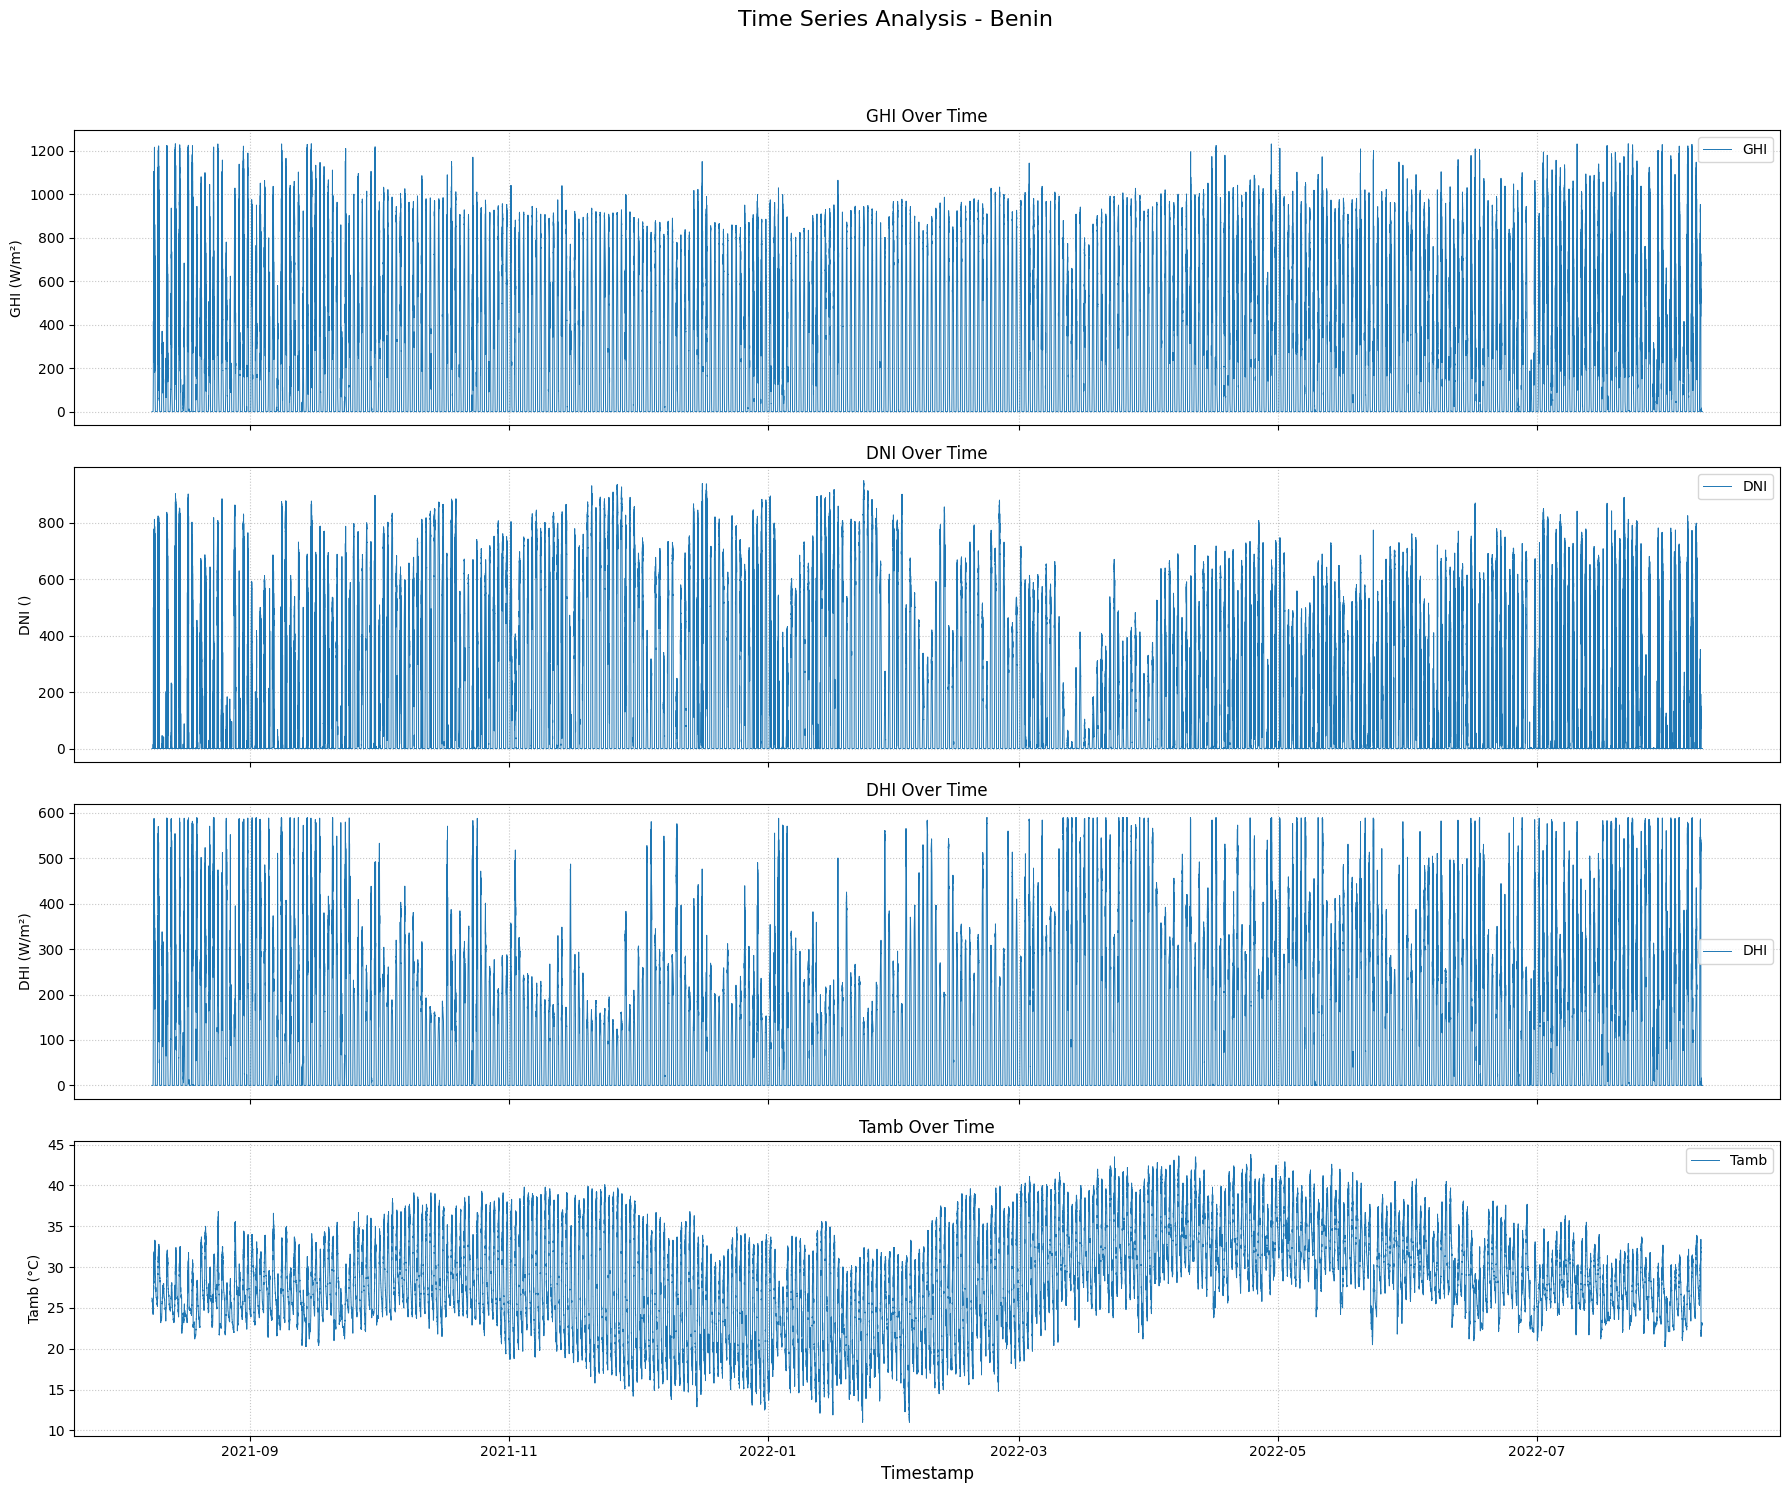

In [19]:




# ==============================================================================
# THE EDA VISUALIZATIONS WILL FOLLOW IN SUBSEQUENT CELLS
# For brevity, I will show the structure for one type of plot (Time Series)
# and you would replicate this cell-based structure for:
# - Cleaning Impact Analysis
# - Correlation & Relationship Analysis
# - Wind & Distribution Analysis
# - Temperature Analysis
# - Bubble Chart
# ==============================================================================

#%%
# ==============================================================================
# CELL 12: Time Series Analysis - Plot Key Variables
# ==============================================================================
"""
Plot key variables (GHI, DNI, DHI, Tamb) against Timestamp to observe
diurnal cycles, trends, and anomalies.
This requires the index to be datetime.
"""
if not df_cleaned.empty and pd.api.types.is_datetime64_any_dtype(df_cleaned.index):
    print("\n--- 3. TIME SERIES ANALYSIS ---")
    cols_to_plot_ts = ['GHI', 'DNI', 'DHI', 'Tamb']
    valid_cols_ts = [col for col in cols_to_plot_ts if col in df_cleaned.columns]

    if valid_cols_ts:
        num_ts_plots = len(valid_cols_ts)
        fig, axes = plt.subplots(nrows=num_ts_plots, ncols=1, figsize=(18, 4 * num_ts_plots), sharex=True)
        if num_ts_plots == 1: axes = [axes] # Ensure axes is iterable

        fig.suptitle(f'Time Series Analysis - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.93) # Adjust y for suptitle

        for i, col in enumerate(valid_cols_ts):
            sns.lineplot(data=df_cleaned, x=df_cleaned.index, y=col, ax=axes[i], label=col, errorbar=None, linewidth=0.7)
            unit = 'W/m²' if 'HI' in col or 'Mod' in col else '°C' if 'T' in col else '%' if 'RH' in col else ''
            axes[i].set_ylabel(f"{col} ({unit})", fontsize=10)
            axes[i].set_title(f"{col} Over Time", loc='center', fontsize=12)
            axes[i].grid(True, linestyle=':', alpha=0.7)
        
        axes[-1].set_xlabel('Timestamp', fontsize=12)
        plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust rect for suptitle
        plt.show()
    else:
        print("No valid columns found for time series plotting in df_cleaned.")
else:
    print("Skipping time series plots as df_cleaned is empty or index is not datetime.")





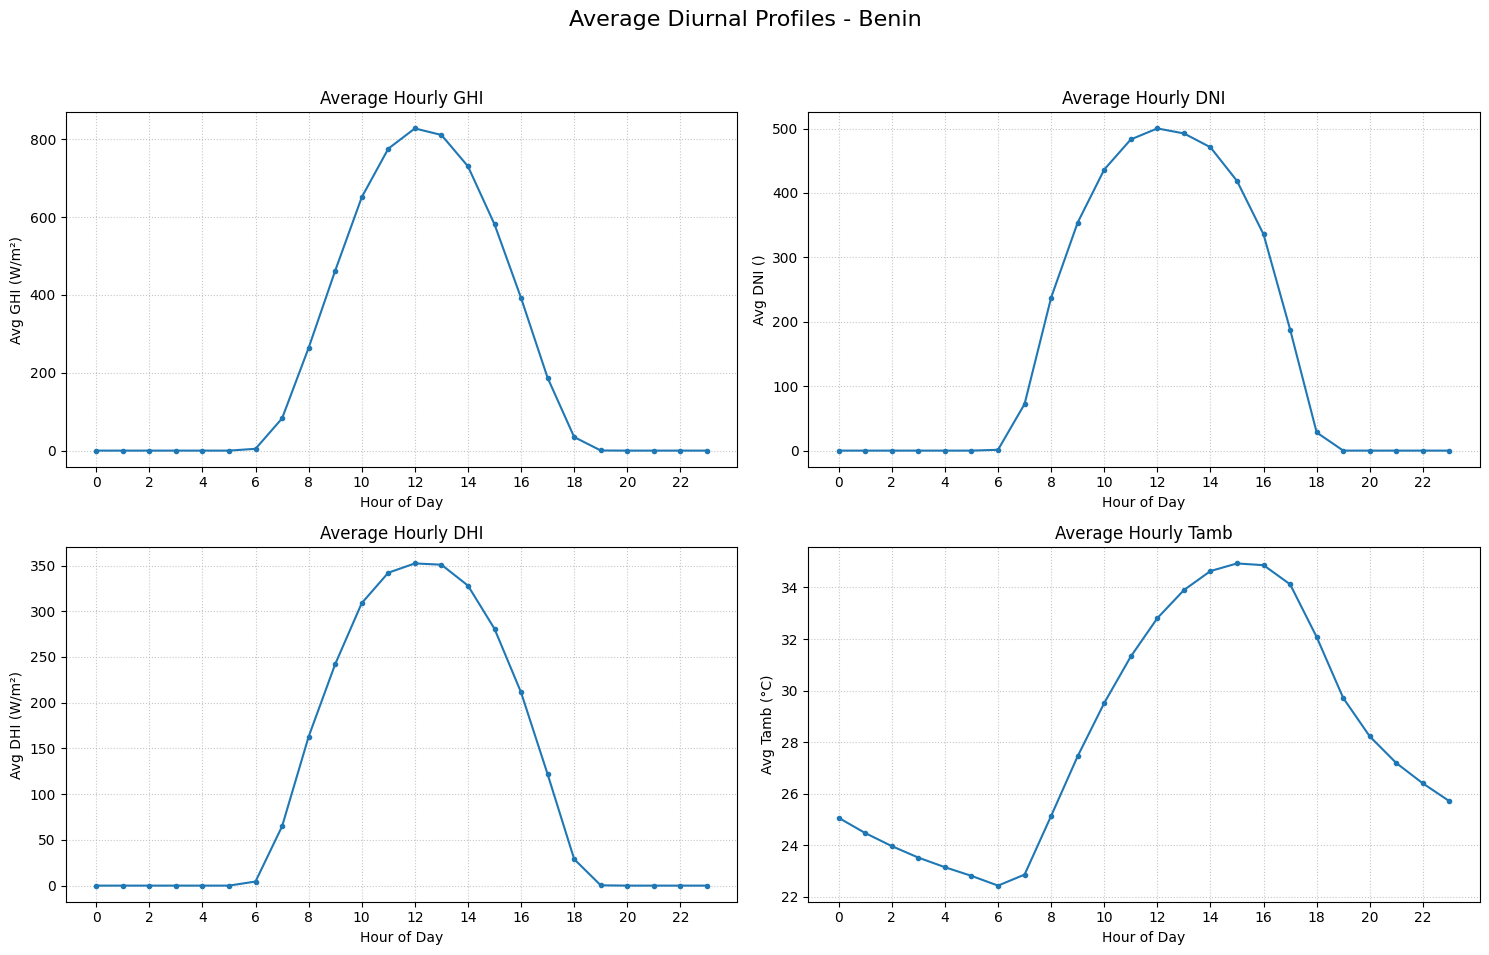

In [20]:
#%%
# ==============================================================================
# CELL 13: Time Series Analysis - Average Diurnal Profiles
# ==============================================================================
"""
Calculate and plot average hourly profiles for the key time series variables
to visualize typical daily patterns.
"""
if not df_cleaned.empty and pd.api.types.is_datetime64_any_dtype(df_cleaned.index):
    # Ensure 'Hour' column is added if not present from previous cell run
    if 'Hour' not in df_cleaned.columns:
        df_cleaned['Hour'] = df_cleaned.index.hour

    cols_for_diurnal = ['GHI', 'DNI', 'DHI', 'Tamb'] # Same as above or could be different
    valid_cols_diurnal = [col for col in cols_for_diurnal if col in df_cleaned.columns]

    if valid_cols_diurnal:
        hourly_avg = df_cleaned.groupby('Hour')[valid_cols_diurnal].mean()

        num_diurnal_plots = len(valid_cols_diurnal)
        num_cols_diurnal_subplot = 2 # Arrange in 2 columns
        num_rows_diurnal_subplot = int(np.ceil(num_diurnal_plots / num_cols_diurnal_subplot))

        plt.figure(figsize=(15, 5 * num_rows_diurnal_subplot))
        plt.suptitle(f'Average Diurnal Profiles - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.95)
        for i, col in enumerate(valid_cols_diurnal):
            plt.subplot(num_rows_diurnal_subplot, num_cols_diurnal_subplot, i+1)
            hourly_avg[col].plot(kind='line', marker='.', linestyle='-')
            unit = 'W/m²' if 'HI' in col or 'Mod' in col else '°C' if 'T' in col else '%' if 'RH' in col else ''
            plt.title(f'Average Hourly {col}', fontsize=12)
            plt.ylabel(f"Avg {col} ({unit})", fontsize=10)
            plt.xlabel("Hour of Day", fontsize=10)
            plt.xticks(np.arange(0, 24, 2))
            plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 1, 0.92])
        plt.show()
    else:
        print("No valid columns for diurnal profile plotting.")
else:
    print("Skipping diurnal profiles as df_cleaned is empty or index is not datetime.")


--- Average Monthly Profiles ---


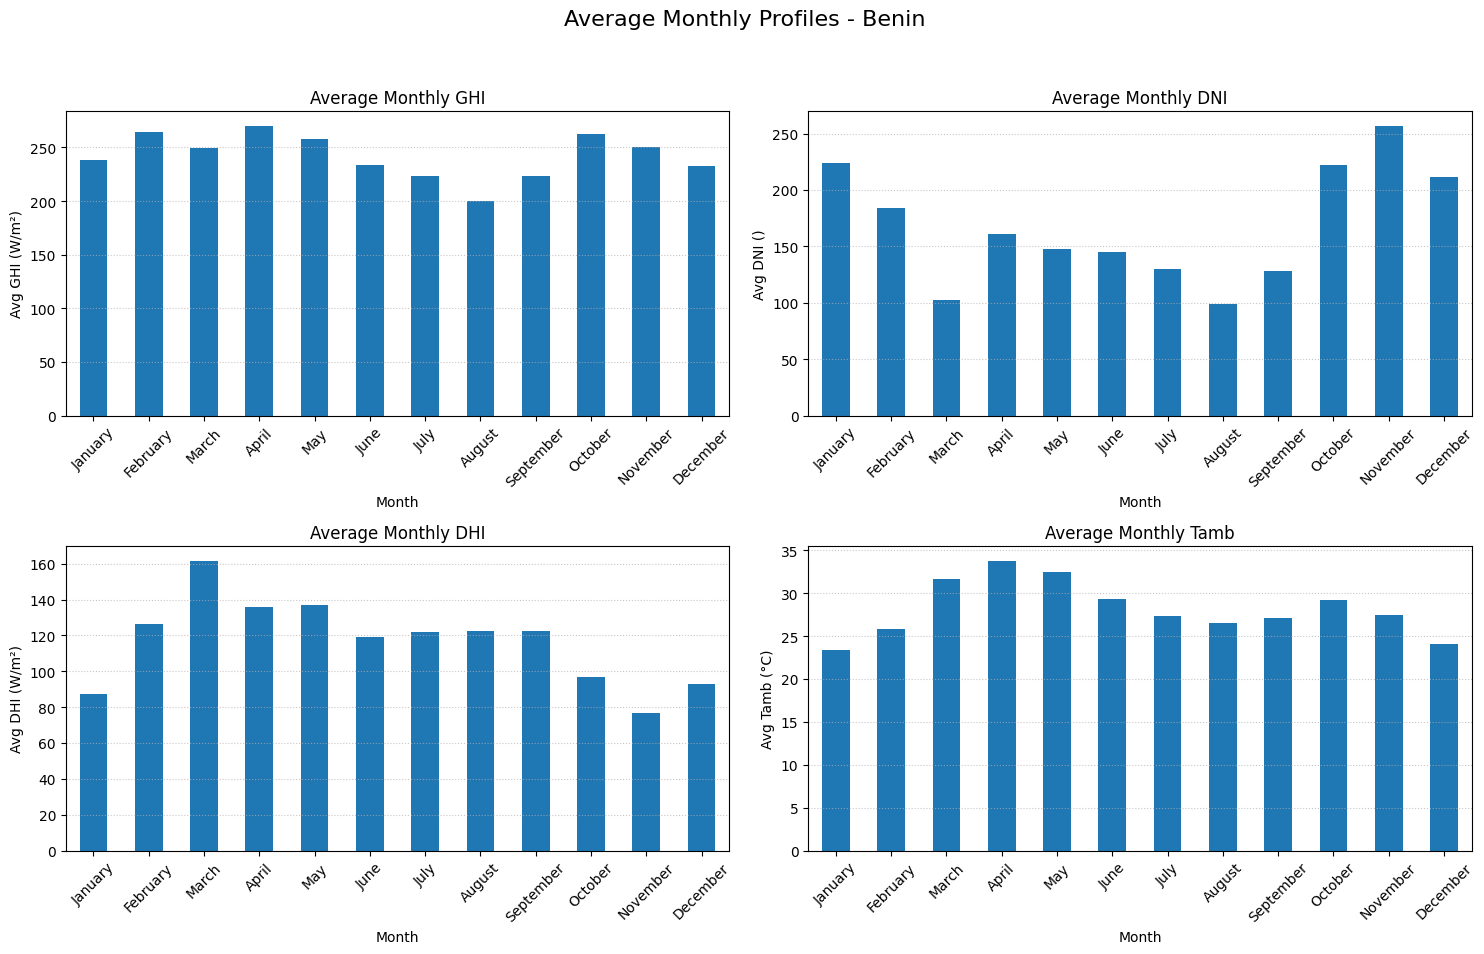

In [21]:
#%%
# ==============================================================================
# CELL 14: Time Series Analysis - Average Monthly Profiles
# ==============================================================================
"""
Calculate and plot average monthly profiles for key variables if the dataset
spans multiple months. This helps in understanding seasonal variations.
"""
if not df_cleaned.empty and pd.api.types.is_datetime64_any_dtype(df_cleaned.index):
    # Check if data spans multiple months
    if df_cleaned.index.to_series().dt.to_period("M").nunique() > 1:
        print("\n--- Average Monthly Profiles ---")
        # Ensure 'Month' column is added
        if 'Month' not in df_cleaned.columns:
             df_cleaned['Month'] = df_cleaned.index.month_name() # Use month name for readability

        cols_for_monthly = ['GHI', 'DNI', 'DHI', 'Tamb'] # Define or reuse from previous
        valid_cols_monthly = [col for col in cols_for_monthly if col in df_cleaned.columns]

        if valid_cols_monthly:
            # Order months correctly if using month name
            month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                           'July', 'August', 'September', 'October', 'November', 'December']
            present_months = [m for m in month_order if m in df_cleaned['Month'].unique()]
            
            if present_months: # Check if any months were found to avoid error with Categorical
                df_cleaned['Month_Ordered'] = pd.Categorical(df_cleaned['Month'], categories=present_months, ordered=True)
                monthly_avg = df_cleaned.groupby('Month_Ordered', observed=False)[valid_cols_monthly].mean()

                num_monthly_plots = len(valid_cols_monthly)
                num_cols_monthly_subplot = 2
                num_rows_monthly_subplot = int(np.ceil(num_monthly_plots / num_cols_monthly_subplot))

                plt.figure(figsize=(15, 5 * num_rows_monthly_subplot))
                plt.suptitle(f'Average Monthly Profiles - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.95)
                for i, col in enumerate(valid_cols_monthly):
                    plt.subplot(num_rows_monthly_subplot, num_cols_monthly_subplot, i+1)
                    monthly_avg[col].plot(kind='bar', rot=45)
                    unit = 'W/m²' if 'HI' in col or 'Mod' in col else '°C' if 'T' in col else '%' if 'RH' in col else ''
                    plt.title(f'Average Monthly {col}', fontsize=12)
                    plt.ylabel(f"Avg {col} ({unit})", fontsize=10)
                    plt.xlabel("Month", fontsize=10)
                    plt.grid(True, axis='y', linestyle=':', alpha=0.7)
                plt.tight_layout(rect=[0, 0, 1, 0.92])
                plt.show()
            else:
                print("No valid month data for ordered plotting.")
        else:
            print("No valid columns for monthly profile plotting.")
    else:
        print("\nData does not span multiple months, or only one month of data available. Skipping monthly profile analysis.")
else:
    print("Skipping monthly profiles as df_cleaned is empty or index is not datetime.")


--- 4. CLEANING IMPACT ANALYSIS ---
Number of cleaning events recorded: 485
  Avg ModA: Pre-Clean=133.91, Post-Clean=307.23, Approx. Improvement=173.32 W/m²
  Avg ModB: Pre-Clean=129.37, Post-Clean=301.97, Approx. Improvement=172.60 W/m²


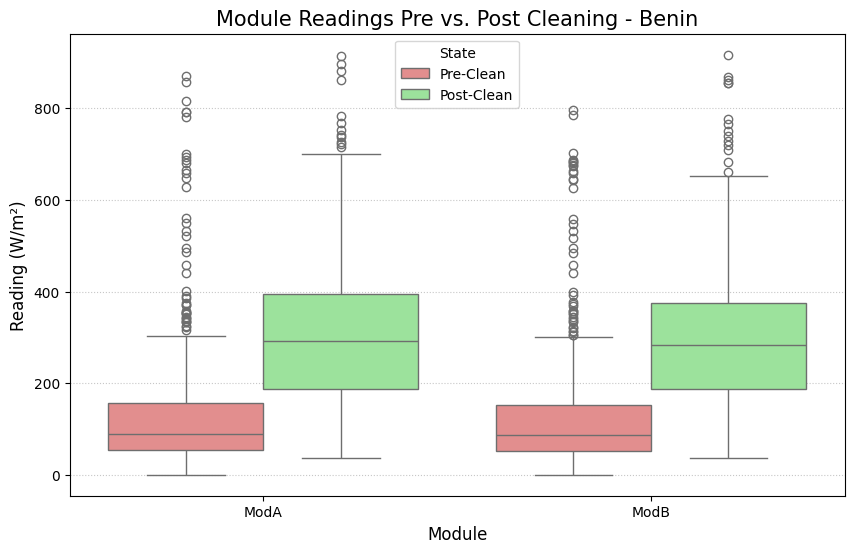

In [22]:
#%%
# ==============================================================================
# CELL 15: Cleaning Impact Analysis
# ==============================================================================
"""
Analyze the impact of 'Cleaning' events on module performance (ModA, ModB).
Compare sensor readings from a defined window before the cleaning event
to readings at or immediately after the cleaning event.
"""
if not df_cleaned.empty:
    print("\n--- 4. CLEANING IMPACT ANALYSIS ---")
    if 'Cleaning' not in df_cleaned.columns:
        print("'Cleaning' column not found. Skipping cleaning impact analysis.")
    elif df_cleaned['Cleaning'].sum() == 0 :
        print("No cleaning events (Cleaning=1) recorded. Skipping cleaning impact analysis.")
    elif not (('ModA' in df_cleaned.columns and 'ModB' in df_cleaned.columns) and \
              pd.api.types.is_datetime64_any_dtype(df_cleaned.index) and \
              pd.api.types.is_numeric_dtype(df_cleaned['ModA']) and \
              pd.api.types.is_numeric_dtype(df_cleaned['ModB'])):
        print("Module data (ModA, ModB numeric type) or datetime index not available/suitable. Skipping cleaning impact analysis.")
    else:
        num_cleaning_events = int(df_cleaned['Cleaning'].sum())
        print(f"Number of cleaning events recorded: {num_cleaning_events}")
        
        cleaning_indices = df_cleaned[df_cleaned['Cleaning'] == 1].index
        
        mod_a_pre_clean_vals = []
        mod_a_post_clean_vals = []
        mod_b_pre_clean_vals = []
        mod_b_post_clean_vals = []
        
        # Define window: e.g., 1 hour before. 'Cleaning=1' timestamp is considered "post-clean"
        time_delta_before = pd.Timedelta(hours=1) # Adjust as needed based on data frequency

        for ts_clean_event in cleaning_indices:
            ts_one_hour_before = ts_clean_event - time_delta_before
            
            if ts_one_hour_before in df_cleaned.index: # Check if the "before" timestamp exists
                mod_a_pre = df_cleaned.loc[ts_one_hour_before, 'ModA']
                mod_a_post = df_cleaned.loc[ts_clean_event, 'ModA']
                mod_b_pre = df_cleaned.loc[ts_one_hour_before, 'ModB']
                mod_b_post = df_cleaned.loc[ts_clean_event, 'ModB']
                
                if pd.notna(mod_a_pre) and pd.notna(mod_a_post):
                    mod_a_pre_clean_vals.append(mod_a_pre)
                    mod_a_post_clean_vals.append(mod_a_post)
                
                if pd.notna(mod_b_pre) and pd.notna(mod_b_post):
                    mod_b_pre_clean_vals.append(mod_b_pre)
                    mod_b_post_clean_vals.append(mod_b_post)

        if mod_a_pre_clean_vals and mod_b_pre_clean_vals: # Ensure there's data to plot
            avg_mod_a_pre = np.mean(mod_a_pre_clean_vals)
            avg_mod_a_post = np.mean(mod_a_post_clean_vals)
            avg_mod_b_pre = np.mean(mod_b_pre_clean_vals)
            avg_mod_b_post = np.mean(mod_b_post_clean_vals)

            print(f"  Avg ModA: Pre-Clean={avg_mod_a_pre:.2f}, Post-Clean={avg_mod_a_post:.2f}, Approx. Improvement={(avg_mod_a_post-avg_mod_a_pre):.2f} W/m²")
            print(f"  Avg ModB: Pre-Clean={avg_mod_b_pre:.2f}, Post-Clean={avg_mod_b_post:.2f}, Approx. Improvement={(avg_mod_b_post-avg_mod_b_pre):.2f} W/m²")

            # Prepare data for boxplot visualization
            plot_data_cleaning = pd.DataFrame({
                'Reading': mod_a_pre_clean_vals + mod_a_post_clean_vals + mod_b_pre_clean_vals + mod_b_post_clean_vals,
                'Module': ['ModA'] * (len(mod_a_pre_clean_vals) + len(mod_a_post_clean_vals)) + \
                          ['ModB'] * (len(mod_b_pre_clean_vals) + len(mod_b_post_clean_vals)),
                'State': ['Pre-Clean'] * len(mod_a_pre_clean_vals) + ['Post-Clean'] * len(mod_a_post_clean_vals) + \
                         ['Pre-Clean'] * len(mod_b_pre_clean_vals) + ['Post-Clean'] * len(mod_b_post_clean_vals)
            })

            plt.figure(figsize=(10, 6))
            sns.boxplot(data=plot_data_cleaning, x='Module', y='Reading', hue='State', palette={'Pre-Clean':'lightcoral', 'Post-Clean':'lightgreen'})
            plt.title(f'Module Readings Pre vs. Post Cleaning - {COUNTRY_NAME.capitalize()}', fontsize=15)
            plt.ylabel('Reading (W/m²)', fontsize=12)
            plt.xlabel('Module', fontsize=12)
            plt.grid(True, linestyle=':', alpha=0.7, axis='y')
            plt.legend(title='State')
            plt.show()
        else:
            print("Not enough paired pre/post cleaning data points for ModA and ModB with valid 'before' timestamps to robustly analyze impact.")
else:
    print("Skipping cleaning impact analysis as df_cleaned is empty.")


--- 5. CORRELATION & RELATIONSHIP ANALYSIS ---

Correlation Heatmap:


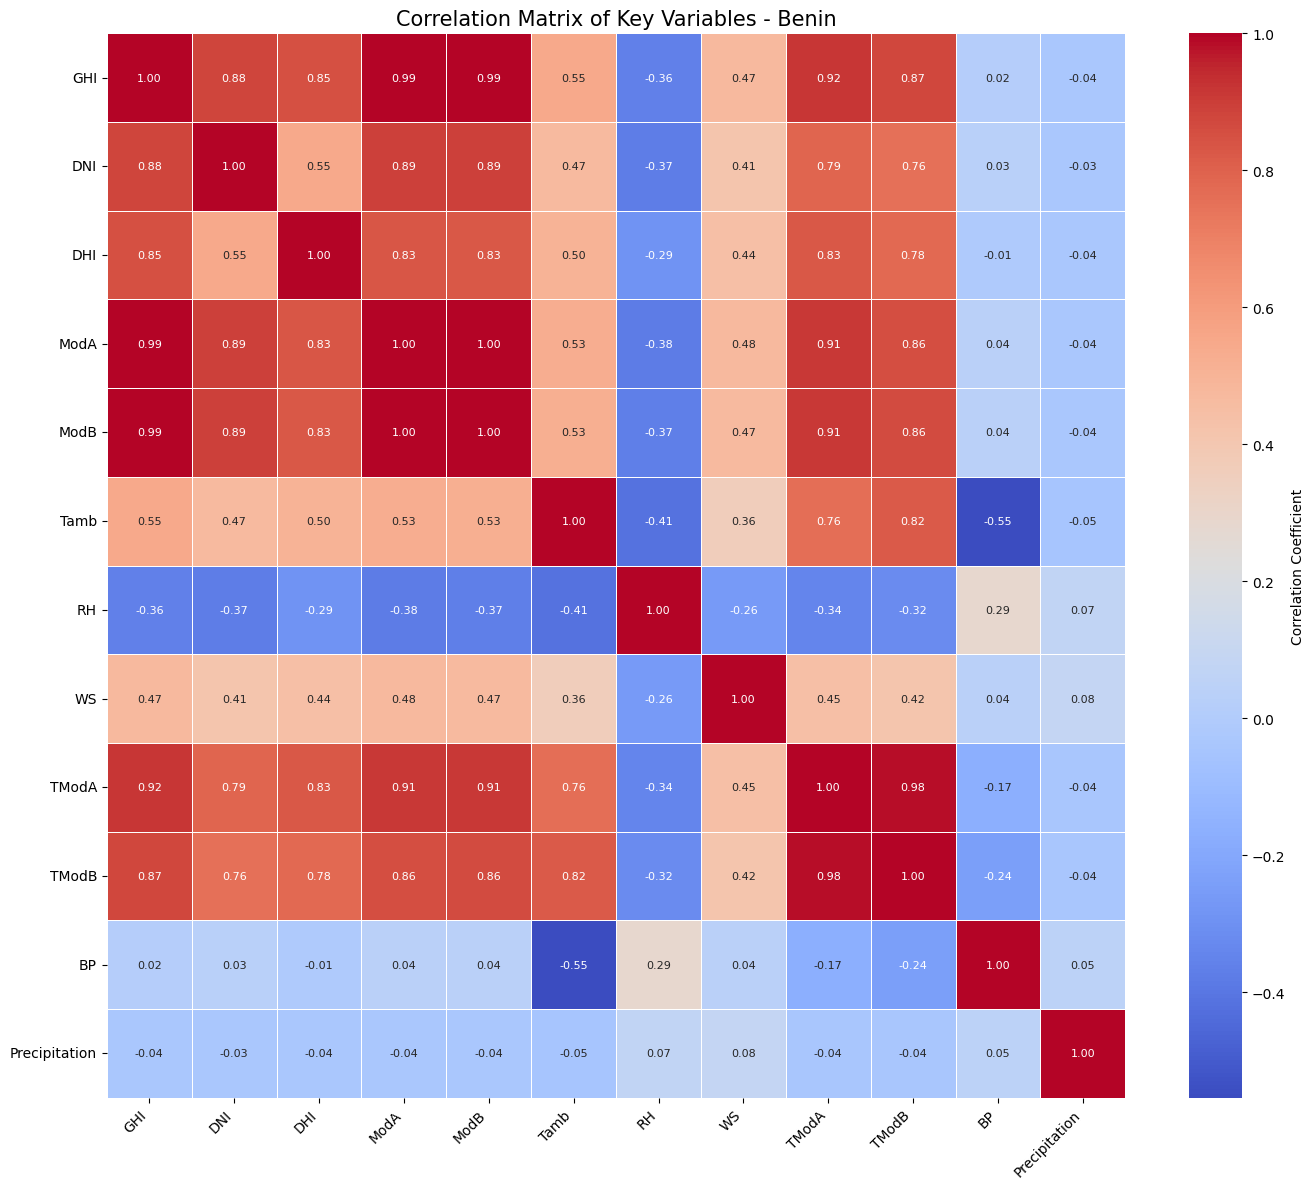

In [23]:
#%%
# ==============================================================================
# CELL 16: Correlation Analysis - Heatmap
# ==============================================================================
"""
Generate a heatmap of the correlation matrix for key numeric variables.
This helps to understand linear relationships between different measurements.
"""
if not df_cleaned.empty:
    print("\n--- 5. CORRELATION & RELATIONSHIP ANALYSIS ---")
    print("\nCorrelation Heatmap:")
    correlation_cols_candidate = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 
                                  'TModA', 'TModB', 'BP', 'Precipitation']
    # Filter for columns that actually exist and are numeric in df_cleaned
    valid_correlation_cols = [col for col in correlation_cols_candidate 
                              if col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col])]

    if len(valid_correlation_cols) > 1:
        correlation_matrix = df_cleaned[valid_correlation_cols].corr()
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, 
                    annot_kws={"size": 8}, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title(f'Correlation Matrix of Key Variables - {COUNTRY_NAME.capitalize()}', fontsize=15)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough valid numeric columns found for a correlation matrix.")
else:
    print("Skipping correlation heatmap as df_cleaned is empty.")


Scatter Plots for Relationship Analysis:


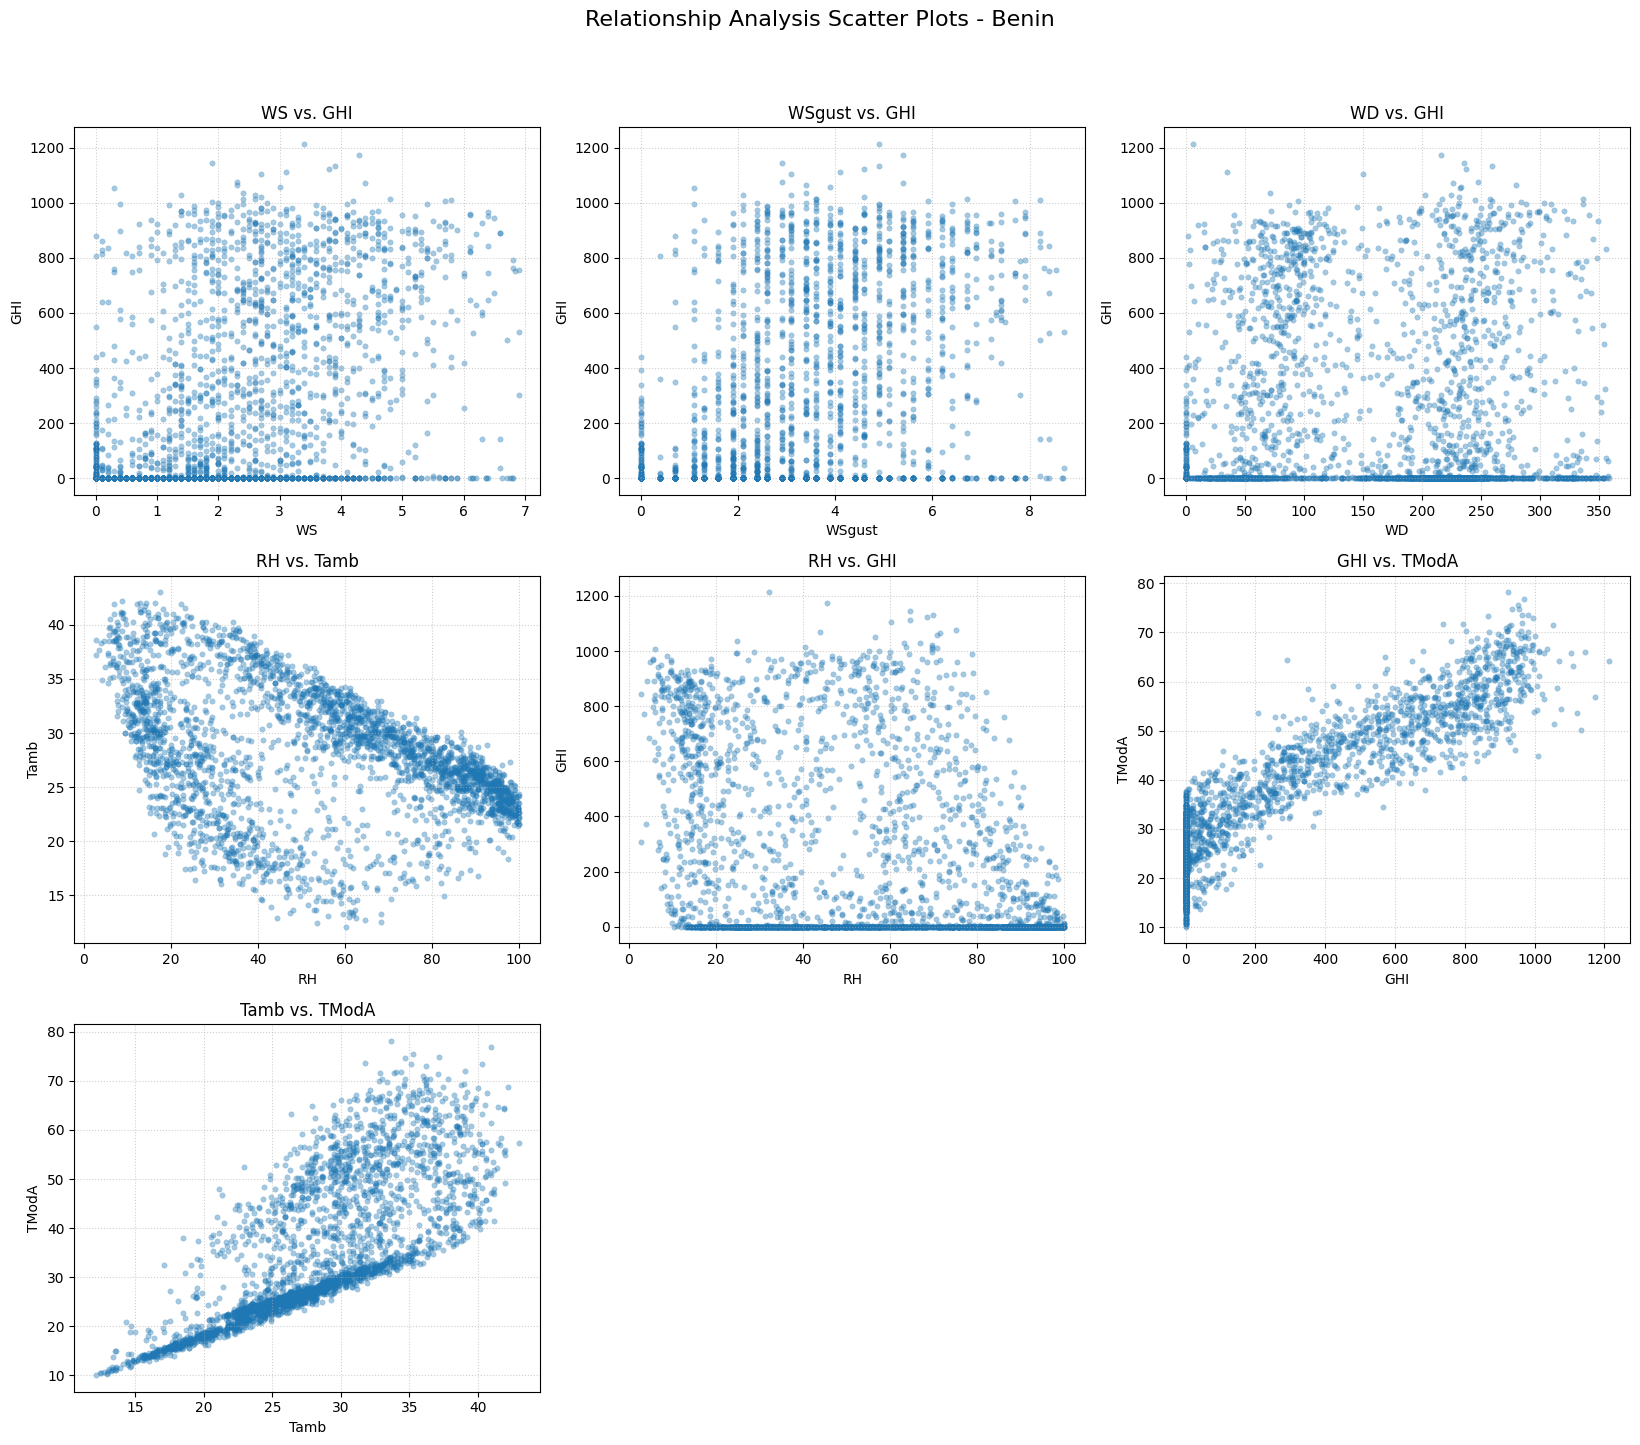

In [24]:
#%%
# ==============================================================================
# CELL 17: Relationship Analysis - Scatter Plots
# ==============================================================================
"""
Create scatter plots to visualize relationships between specific pairs of variables.
A sample of the data is used for performance if the dataset is large.
"""
if not df_cleaned.empty:
    print("\nScatter Plots for Relationship Analysis:")
    scatter_cols_pairs_to_plot = [
        ('WS', 'GHI'), ('WSgust', 'GHI'), ('WD', 'GHI'), # Wind vs. Irradiance
        ('RH', 'Tamb'), ('RH', 'GHI'),                  # Humidity vs. Temp & Irradiance
        ('GHI', 'TModA'), ('Tamb', 'TModA')             # Irradiance/Ambient Temp vs. Module Temp
    ]
    
    num_scatter_plots = len(scatter_cols_pairs_to_plot)
    if num_scatter_plots > 0 :
        num_cols_scatter_subplot = 3 # Aim for 3 plots per row
        num_rows_scatter_subplot = int(np.ceil(num_scatter_plots / num_cols_scatter_subplot))

        plt.figure(figsize=(5.5 * num_cols_scatter_subplot, 5 * num_rows_scatter_subplot))
        plt.suptitle(f'Relationship Analysis Scatter Plots - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.96) # Adjust y for suptitle

        # Use a smaller sample for scatter plots if data is very large, to avoid overplotting and slow rendering
        sample_size_scatter = min(3000, len(df_cleaned)) # Max 3000 points
        df_sample_scatter = df_cleaned.sample(sample_size_scatter) if len(df_cleaned) > sample_size_scatter else df_cleaned

        for i, (col_x_name, col_y_name) in enumerate(scatter_cols_pairs_to_plot):
            plt.subplot(num_rows_scatter_subplot, num_cols_scatter_subplot, i+1)
            if col_x_name in df_sample_scatter.columns and col_y_name in df_sample_scatter.columns and \
               pd.api.types.is_numeric_dtype(df_sample_scatter[col_x_name]) and \
               pd.api.types.is_numeric_dtype(df_sample_scatter[col_y_name]):
                
                sns.scatterplot(data=df_sample_scatter, x=col_x_name, y=col_y_name, alpha=0.4, s=15, edgecolor=None)
                plt.title(f'{col_x_name} vs. {col_y_name}', fontsize=12)
                plt.xlabel(col_x_name, fontsize=10)
                plt.ylabel(col_y_name, fontsize=10)
                plt.grid(True, linestyle=':', alpha=0.6)
            else:
                plt.text(0.5, 0.5, f'{col_x_name} or {col_y_name}\nnot available/numeric', 
                         ha='center', va='center', fontsize=10, wrap=True)
                plt.title(f'{col_x_name} vs. {col_y_name}', fontsize=12)
                plt.xlabel(col_x_name, fontsize=10) # Still show labels for context
                plt.ylabel(col_y_name, fontsize=10)


        plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust rect for suptitle
        plt.show()
    else:
        print("No scatter plot pairs defined or suitable.")
else:
    print("Skipping scatter plots as df_cleaned is empty.")


--- 6. WIND & DISTRIBUTION ANALYSIS ---

Histograms for GHI and Wind Speed (WS):


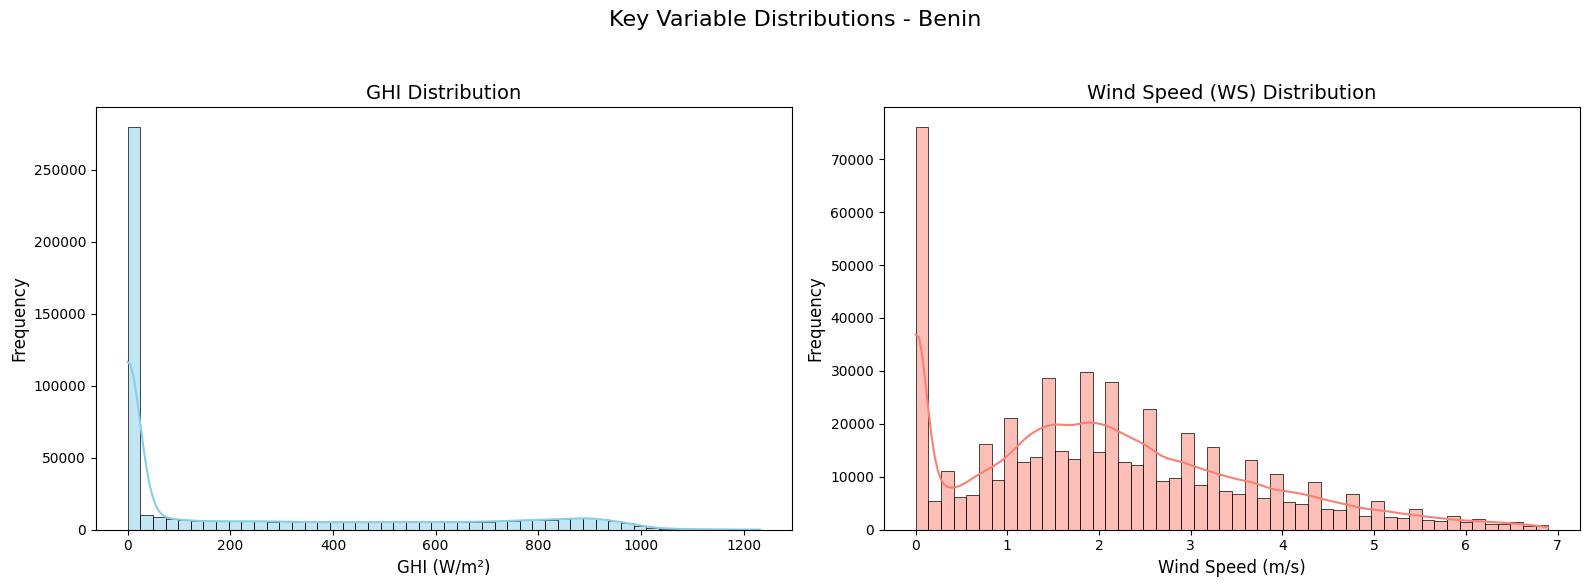

In [25]:
#%%
# ==============================================================================
# CELL 18: Wind & Distribution Analysis - Histograms
# ==============================================================================
"""
Plot histograms for GHI and Wind Speed (WS) to understand their distributions.
"""
if not df_cleaned.empty:
    print("\n--- 6. WIND & DISTRIBUTION ANALYSIS ---")
    print("\nHistograms for GHI and Wind Speed (WS):")
    
    plt.figure(figsize=(16, 6))
    plt.suptitle(f'Key Variable Distributions - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.97)

    plt.subplot(1, 2, 1)
    if 'GHI' in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned['GHI']):
        sns.histplot(df_cleaned['GHI'].dropna(), kde=True, bins=50, color='skyblue', edgecolor='black', linewidth=0.5)
        plt.title('GHI Distribution', fontsize=14)
        plt.xlabel('GHI (W/m²)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    else:
        plt.text(0.5, 0.5, 'GHI data not available\nor not numeric', ha='center', va='center')
        plt.title('GHI Distribution', fontsize=14)

    plt.subplot(1, 2, 2)
    if 'WS' in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned['WS']):
        sns.histplot(df_cleaned['WS'].dropna(), kde=True, bins=50, color='salmon', edgecolor='black', linewidth=0.5)
        plt.title('Wind Speed (WS) Distribution', fontsize=14)
        plt.xlabel('Wind Speed (m/s)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    else:
        plt.text(0.5, 0.5, 'WS data not available\nor not numeric', ha='center', va='center')
        plt.title('Wind Speed (WS) Distribution', fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
else:
    print("Skipping GHI/WS histograms as df_cleaned is empty.")


Wind Rose / Directional Analysis:
  Attempting to generate Wind Rose (using 'windrose' library)...


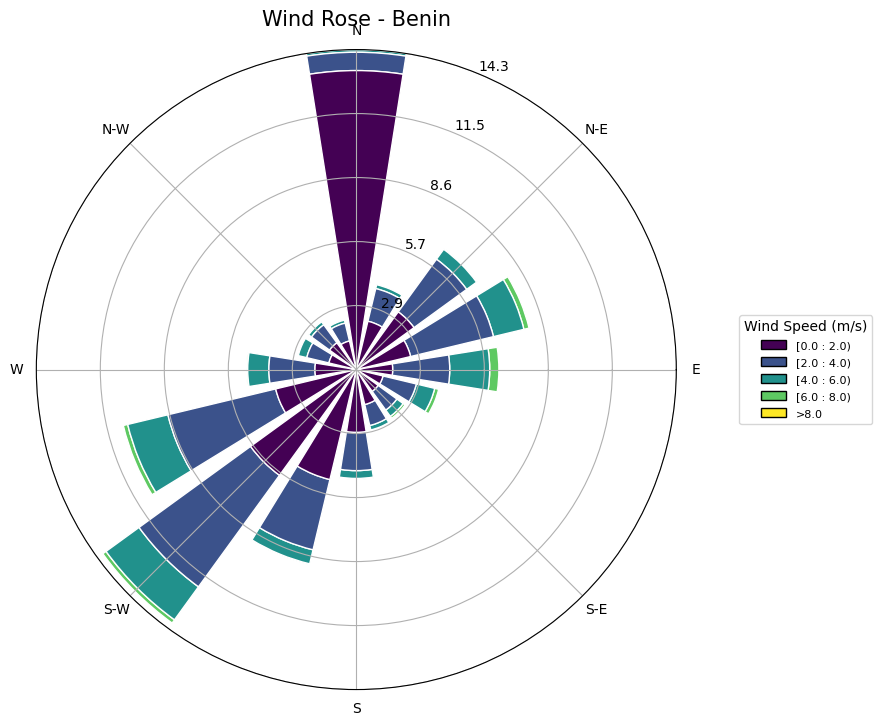

In [26]:
#%%
# ==============================================================================
# CELL 19: Wind & Distribution Analysis - Wind Rose / Binned Plot
# ==============================================================================
"""
Generate a Wind Rose if the 'windrose' library is installed.
Otherwise, a simplified binned bar plot of wind direction frequency and mean speed is shown.
"""
if not df_cleaned.empty:
    print("\nWind Rose / Directional Analysis:")
    ws_col, wd_col = 'WS', 'WD' # Define column names for clarity

    if ws_col in df_cleaned.columns and wd_col in df_cleaned.columns and \
       pd.api.types.is_numeric_dtype(df_cleaned[ws_col]) and \
       pd.api.types.is_numeric_dtype(df_cleaned[wd_col]):
        
        wind_data_for_plot = df_cleaned[[ws_col, wd_col]].dropna()
        if not wind_data_for_plot.empty and len(wind_data_for_plot) > 10: # Need some data points

            if WINDROSE_INSTALLED:
                print("  Attempting to generate Wind Rose (using 'windrose' library)...")
                try:
                    # Define wind speed bins for the legend for better interpretability
                    ws_bins_rose = np.arange(0, wind_data_for_plot[ws_col].max() + 2, 2) # Bins of 2 m/s, or adjust
                    if len(ws_bins_rose) < 2: ws_bins_rose = [0, wind_data_for_plot[ws_col].max() + 2] # Ensure at least one bin

                    fig_rose = plt.figure(figsize=(8, 8))
                    ax_rose = WindroseAxes.from_ax(fig=fig_rose)
                    ax_rose.bar(wind_data_for_plot[wd_col], wind_data_for_plot[ws_col], 
                                normed=True, opening=0.8, edgecolor='white', bins=ws_bins_rose)
                    ax_rose.set_legend(title="Wind Speed (m/s)", loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize=9)
                    plt.suptitle(f'Wind Rose - {COUNTRY_NAME.capitalize()}', y=0.95, fontsize=15)
                    plt.show()
                except Exception as e_rose:
                    print(f"    Error creating wind rose with library: {e_rose}.")
                    print("    Falling back to simplified binned plot if possible.")
                    WINDROSE_INSTALLED = False # Temporarily disable to trigger fallback for this run
            
            if not WINDROSE_INSTALLED: # Fallback or if library was never installed
                print("  Generating Simplified Binned Wind Direction Plot ('windrose' library not used or failed)...")
                wd_bins_simplified = np.arange(0, 361, 22.5) # 16 sectors
                wd_labels_simplified = [f'{wd_bins_simplified[j]:.0f}-{wd_bins_simplified[j+1]:.0f}°' for j in range(len(wd_bins_simplified)-1)]
                
                wind_data_for_plot['WD_Binned'] = pd.cut(wind_data_for_plot[wd_col], bins=wd_bins_simplified, 
                                                         labels=wd_labels_simplified, right=False, include_lowest=True)
                
                wind_dist_summary = wind_data_for_plot.groupby('WD_Binned', observed=False)[ws_col].agg(
                    Frequency='count', Mean_WS='mean'
                ).reset_index()

                if not wind_dist_summary.empty:
                    fig_binned, ax1_binned = plt.subplots(figsize=(14, 8))
                    
                    sns.barplot(data=wind_dist_summary, x='WD_Binned', y='Frequency', 
                                color='lightseagreen', ax=ax1_binned, label='Frequency')
                    ax1_binned.set_xlabel('Wind Direction Sectors', fontsize=12)
                    ax1_binned.set_ylabel('Frequency of Occurrence', color='lightseagreen', fontsize=12)
                    ax1_binned.tick_params(axis='y', labelcolor='lightseagreen')
                    ax1_binned.tick_params(axis='x', rotation=45, ha='right', fontsize=10)

                    ax2_binned = ax1_binned.twinx()
                    sns.lineplot(data=wind_dist_summary, x='WD_Binned', y='Mean_WS', 
                                 color='crimson', marker='o', sort=False, ax=ax2_binned, 
                                 label='Mean Wind Speed (m/s)', linewidth=2)
                    ax2_binned.set_ylabel('Mean Wind Speed (m/s)', color='crimson', fontsize=12)
                    ax2_binned.tick_params(axis='y', labelcolor='crimson')
                    
                    lines1, labels1 = ax1_binned.get_legend_handles_labels()
                    lines2, labels2 = ax2_binned.get_legend_handles_labels()
                    ax_combined_legend = ax1_binned.legend(lines1 + lines2, labels1 + labels2, 
                                                           loc='upper center', bbox_to_anchor=(0.5, -0.25), 
                                                           ncol=2, frameon=False, fontsize=10) # Legend below plot
                    
                    plt.title(f'Wind Direction Frequency and Mean Speed - {COUNTRY_NAME.capitalize()}', fontsize=15, pad=20)
                    plt.grid(False) # Grid often too busy here
                    plt.tight_layout(rect=[0, 0.08, 1, 0.95]) # Adjust for legend
                    plt.show()
                else:
                    print("    Could not generate binned wind direction plot (no data after binning).")
        else:
            print("  Not enough valid Wind Speed/Direction data for directional plot.")
    else:
        print("  Wind Speed (WS) or Wind Direction (WD) data not available/suitable for directional analysis.")
else:
    print("Skipping wind directional analysis as df_cleaned is empty.")


--- 7. TEMPERATURE ANALYSIS (Module Temperature Rise) ---


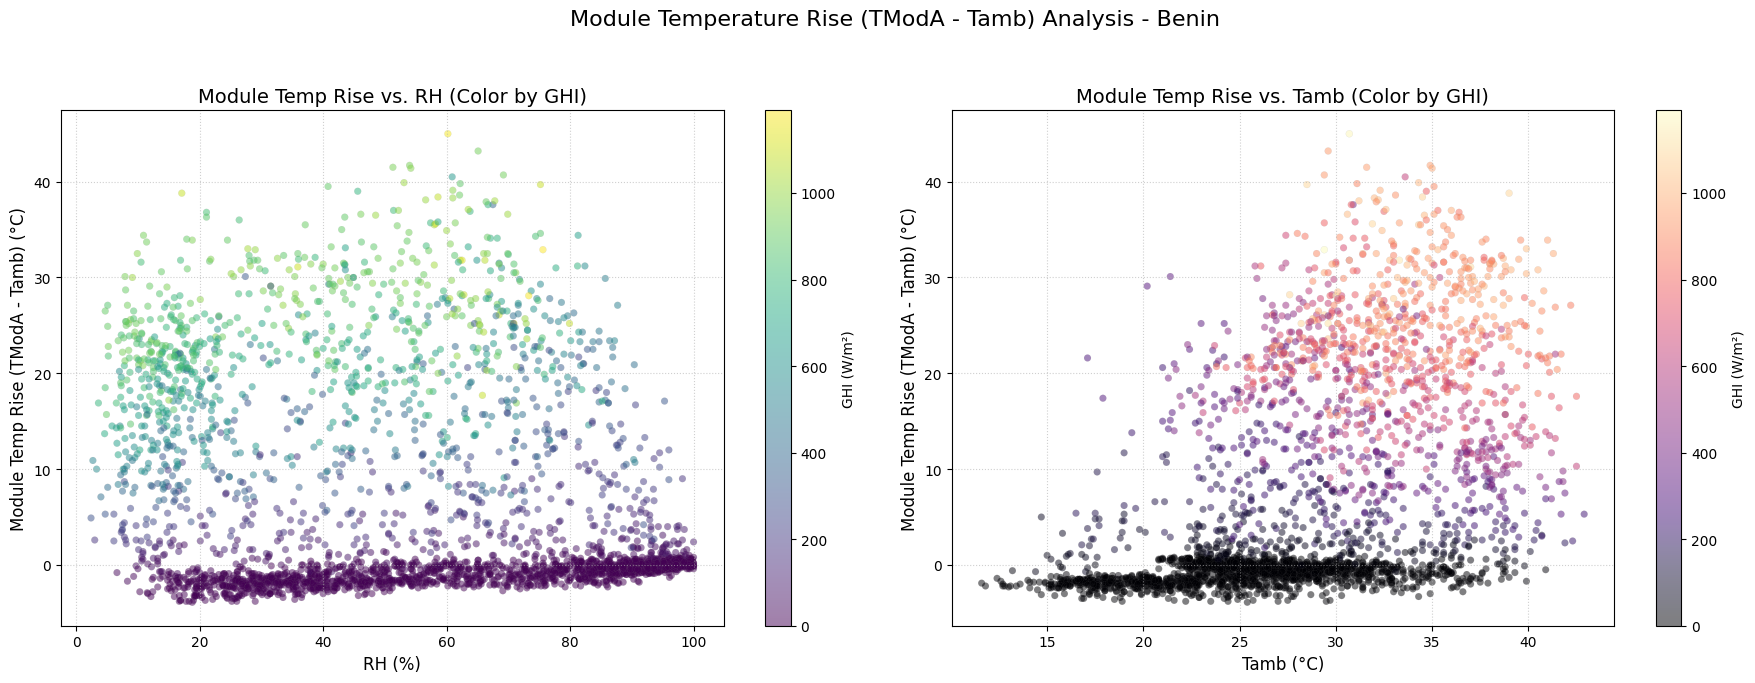

In [27]:
#%%
# ==============================================================================
# CELL 20: Temperature Analysis (RH Influence on Module Temperature Rise)
# ==============================================================================
"""
Examine how Relative Humidity (RH) and Ambient Temperature (Tamb) might influence
the rise of module temperature (TModA - Tamb), especially under varying GHI conditions.
"""
if not df_cleaned.empty:
    print("\n--- 7. TEMPERATURE ANALYSIS (Module Temperature Rise) ---")
    
    tmod_col, tamb_col, ghi_col, rh_col = 'TModA', 'Tamb', 'GHI', 'RH' # Focus on ModA for example
    
    # Ensure necessary columns are present and numeric
    required_temp_cols = [tmod_col, tamb_col, ghi_col, rh_col]
    if all(col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]) for col in required_temp_cols):
        
        # Calculate temperature delta if not already done (e.g. for sampling)
        df_cleaned['TMod_Delta'] = df_cleaned[tmod_col] - df_cleaned[tamb_col]
        
        # Use a sample for plotting if data is large
        sample_size_temp = min(3000, len(df_cleaned))
        df_sample_temp = df_cleaned.sample(sample_size_temp) if len(df_cleaned) > sample_size_temp else df_cleaned

        plt.figure(figsize=(18, 7))
        plt.suptitle(f'Module Temperature Rise ({tmod_col} - {tamb_col}) Analysis - {COUNTRY_NAME.capitalize()}', fontsize=16, y=0.97)

        # Plot 1: Temp Rise vs. RH, colored by GHI
        plt.subplot(1, 2, 1)
        if df_sample_temp['TMod_Delta'].notna().any(): # Ensure there's data to plot
            sc_rh = plt.scatter(df_sample_temp[rh_col], df_sample_temp['TMod_Delta'],
                             c=df_sample_temp[ghi_col], cmap='viridis', alpha=0.5, s=25, edgecolors='grey', linewidth=0.1)
            plt.colorbar(sc_rh, label=f'{ghi_col} (W/m²)')
            plt.xlabel(f'{rh_col} (%)', fontsize=12)
            plt.ylabel(f'Module Temp Rise ({tmod_col} - {tamb_col}) (°C)', fontsize=12)
            plt.title(f'Module Temp Rise vs. {rh_col} (Color by {ghi_col})', fontsize=14)
            plt.grid(True, linestyle=':', alpha=0.6)
        else:
            plt.text(0.5, 0.5, 'Not enough valid data for\nTemp Rise vs. RH plot', ha='center', va='center', wrap=True)
            plt.title(f'Module Temp Rise vs. {rh_col}')


        # Plot 2: Temp Rise vs. Ambient Temp, colored by GHI
        plt.subplot(1, 2, 2)
        if df_sample_temp['TMod_Delta'].notna().any(): # Ensure there's data to plot
            sc_tamb = plt.scatter(df_sample_temp[tamb_col], df_sample_temp['TMod_Delta'],
                             c=df_sample_temp[ghi_col], cmap='magma', alpha=0.5, s=25, edgecolors='grey', linewidth=0.1)
            plt.colorbar(sc_tamb, label=f'{ghi_col} (W/m²)')
            plt.xlabel(f'{tamb_col} (°C)', fontsize=12)
            # Y-label can be omitted if it's the same as the plot on the left, or repeated for clarity
            plt.ylabel(f'Module Temp Rise ({tmod_col} - {tamb_col}) (°C)', fontsize=12)
            plt.title(f'Module Temp Rise vs. {tamb_col} (Color by {ghi_col})', fontsize=14)
            plt.grid(True, linestyle=':', alpha=0.6)
        else:
            plt.text(0.5, 0.5, 'Not enough valid data for\nTemp Rise vs. Tamb plot', ha='center', va='center', wrap=True)
            plt.title(f'Module Temp Rise vs. {tamb_col}')

        plt.tight_layout(rect=[0, 0, 1, 0.93])
        plt.show()
        
        # Clean up the temporary delta column
        if 'TMod_Delta' in df_cleaned.columns:
            df_cleaned.drop(columns=['TMod_Delta'], inplace=True)
    else:
        print(f"  One or more required columns ({', '.join(required_temp_cols)}) not available/suitable for temperature rise analysis.")
else:
    print("Skipping temperature analysis as df_cleaned is empty.")


--- 8. BUBBLE CHART (GHI vs. Tamb, Bubbles by RH) ---


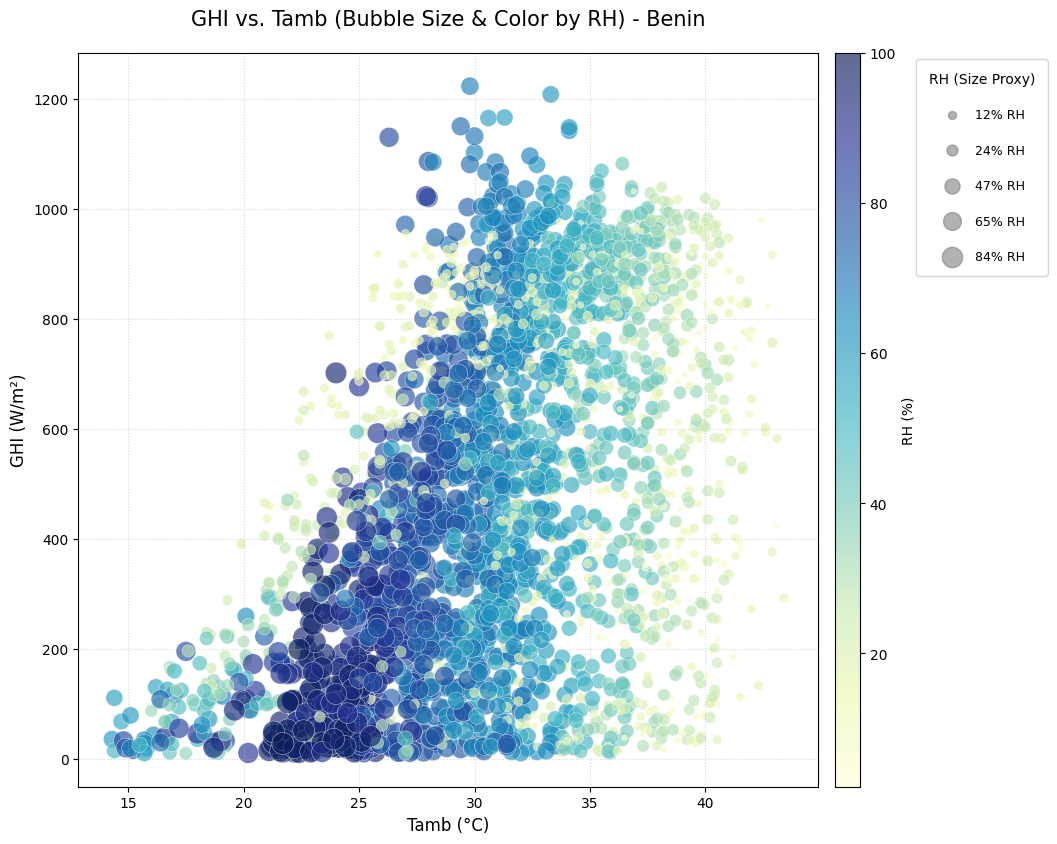

In [28]:
#%%
# ==============================================================================
# CELL 21: Bubble Chart - GHI vs. Tamb, Bubbles by RH
# ==============================================================================
"""
Create a bubble chart to visualize the relationship between GHI and Ambient Temperature (Tamb),
where the size and color of the bubbles are determined by Relative Humidity (RH).
This plot focuses on daytime conditions (GHI > 10 W/m²).
"""
if not df_cleaned.empty:
    print("\n--- 8. BUBBLE CHART (GHI vs. Tamb, Bubbles by RH) ---")
    
    # Define columns for clarity
    ghi_col_bubble, tamb_col_bubble, rh_col_bubble = 'GHI', 'Tamb', 'RH'
    
    # Ensure necessary columns are present and numeric
    if all(col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]) \
           for col in [ghi_col_bubble, tamb_col_bubble, rh_col_bubble]):
        
        # Filter for significant daytime GHI to make the plot more meaningful
        daytime_data_rh_bubble = df_cleaned[df_cleaned[ghi_col_bubble] > 10].copy() # Use a small threshold for GHI
        
        if not daytime_data_rh_bubble.empty:
            # Sample data if it's very large
            sample_size_bubble = min(3000, len(daytime_data_rh_bubble))
            df_sample_rh_bubble = daytime_data_rh_bubble.sample(sample_size_bubble) \
                                  if len(daytime_data_rh_bubble) > sample_size_bubble else daytime_data_rh_bubble
            
            plt.figure(figsize=(13, 9))
            
            # Scale RH for bubble size (s can be an array). Ensure positive, non-zero sizes.
            # Add a small constant if RH can be 0, and adjust multiplier for visual appeal.
            rh_values_for_size = df_sample_rh_bubble[rh_col_bubble].fillna(df_sample_rh_bubble[rh_col_bubble].median())
            bubble_sizes_val_rh = (rh_values_for_size + 1) * 2.5 # Adjust multiplier as needed

            scatter_plot_rh_bubble = plt.scatter(
                df_sample_rh_bubble[tamb_col_bubble], df_sample_rh_bubble[ghi_col_bubble],
                s=bubble_sizes_val_rh,
                c=df_sample_rh_bubble[rh_col_bubble], # Color bubbles by RH as well
                cmap='YlGnBu', # A good sequential colormap for humidity
                alpha=0.65,    # Transparency
                edgecolors='w', linewidth=0.4 # Edge color for bubble definition
            )
            
            plt.xlabel(f'{tamb_col_bubble} (°C)', fontsize=12)
            plt.ylabel(f'{ghi_col_bubble} (W/m²)', fontsize=12)
            plt.title(f'{ghi_col_bubble} vs. {tamb_col_bubble} (Bubble Size & Color by {rh_col_bubble}) - {COUNTRY_NAME.capitalize()}', 
                      fontsize=15, pad=20)
            
            # Colorbar for the RH color mapping
            cbar_rh_bubble = plt.colorbar(scatter_plot_rh_bubble, label=f'{rh_col_bubble} (%)', pad=0.02, aspect=30)
            
            # Create a legend for bubble sizes (more involved for continuous sizes)
            # Show a few representative bubble sizes based on RH percentiles
            rh_percentiles_for_legend = np.percentile(rh_values_for_size.dropna(), [10, 30, 50, 70, 90])
            legend_sizes_rh = (rh_percentiles_for_legend + 1) * 2.5 # Use same scaling
            
            handles_rh_legend = [plt.scatter([], [], s=s, color='gray', alpha=0.6, label=f"{p:.0f}% RH") 
                                 for s, p in zip(legend_sizes_rh, rh_percentiles_for_legend)]
            
            legend_bubble_rh = plt.legend(handles=handles_rh_legend, title=f"{rh_col_bubble} (Size Proxy)", 
                                          loc="upper right", bbox_to_anchor=(1.32, 1), 
                                          labelspacing=1.8, borderpad=1, frameon=True, fontsize=9)
            plt.setp(legend_bubble_rh.get_texts(), color='black') # Ensure legend text is visible

            plt.grid(True, linestyle=':', alpha=0.5)
            plt.tight_layout(rect=[0, 0, 0.83, 0.95]) # Adjust rect to make space for legend and colorbar
            plt.show()
            
        else:
            print(f"  No significant daytime data ({ghi_col_bubble} > 10 W/m²) available for RH bubble chart.")
    else:
        print(f"  Required columns ({ghi_col_bubble}, {tamb_col_bubble}, {rh_col_bubble}) not available/suitable for RH bubble chart.")
else:
    print("Skipping RH bubble chart as df_cleaned is empty.")


--- Bubble Chart (GHI vs. Tamb, Bubbles by BP) ---


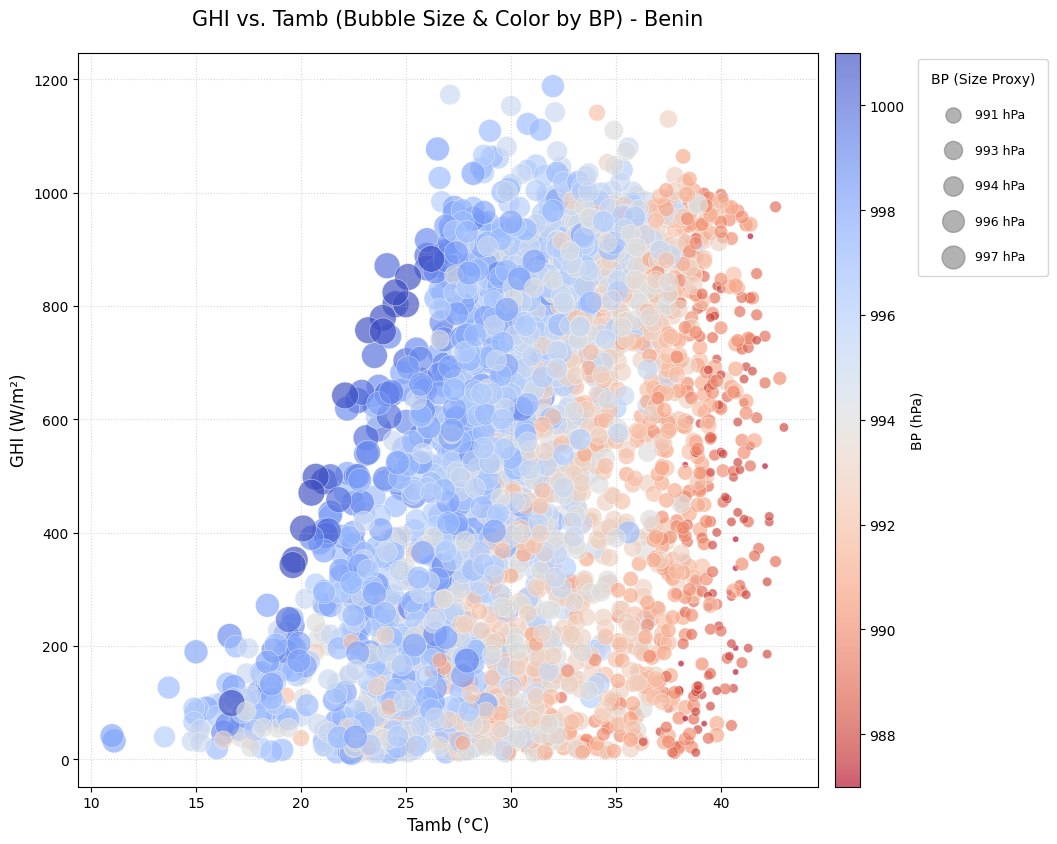

In [29]:
#%%
# ==============================================================================
# CELL 22: Bubble Chart - GHI vs. Tamb, Bubbles by BP (Barometric Pressure)
# ==============================================================================
"""
Create an alternative bubble chart: GHI vs. Tamb, with bubble size and color
determined by Barometric Pressure (BP).
Focuses on daytime conditions (GHI > 10 W/m²).
"""
if not df_cleaned.empty:
    print("\n--- Bubble Chart (GHI vs. Tamb, Bubbles by BP) ---")
    
    ghi_col_bp, tamb_col_bp, bp_col_bubble = 'GHI', 'Tamb', 'BP'
    
    if all(col in df_cleaned.columns and pd.api.types.is_numeric_dtype(df_cleaned[col]) \
           for col in [ghi_col_bp, tamb_col_bp, bp_col_bubble]):
        
        daytime_data_bp_bubble = df_cleaned[df_cleaned[ghi_col_bp] > 10].copy()
        
        if not daytime_data_bp_bubble.empty:
            sample_size_bp_bubble = min(3000, len(daytime_data_bp_bubble))
            df_sample_bp_bubble = daytime_data_bp_bubble.sample(sample_size_bp_bubble) \
                                  if len(daytime_data_bp_bubble) > sample_size_bp_bubble else daytime_data_bp_bubble

            plt.figure(figsize=(13, 9))
            
            bp_values_for_size = df_sample_bp_bubble[bp_col_bubble].fillna(df_sample_bp_bubble[bp_col_bubble].median())
            # Normalize BP for bubble size if range is large, or scale directly
            bp_min_val = bp_values_for_size.min()
            bp_max_val = bp_values_for_size.max()
            if (bp_max_val - bp_min_val) > 0: # Avoid division by zero if BP is constant
                 bp_normalized = (bp_values_for_size - bp_min_val) / (bp_max_val - bp_min_val)
                 bubble_sizes_val_bp = (bp_normalized * 350) + 20 # Scale to a visible range (e.g., 20-370)
            else: # Handle case where BP is constant
                 bubble_sizes_val_bp = 50 # Default fixed size

            scatter_plot_bp_bubble = plt.scatter(
                df_sample_bp_bubble[tamb_col_bp], df_sample_bp_bubble[ghi_col_bp],
                s=bubble_sizes_val_bp,
                c=df_sample_bp_bubble[bp_col_bubble],
                cmap='coolwarm_r', # Reversed coolwarm for pressure (often high=stable, low=stormy)
                alpha=0.65,
                edgecolors='w', linewidth=0.4
            )
            
            plt.xlabel(f'{tamb_col_bp} (°C)', fontsize=12)
            plt.ylabel(f'{ghi_col_bp} (W/m²)', fontsize=12)
            plt.title(f'{ghi_col_bp} vs. {tamb_col_bp} (Bubble Size & Color by {bp_col_bubble}) - {COUNTRY_NAME.capitalize()}', 
                      fontsize=15, pad=20)
            
            cbar_bp_bubble = plt.colorbar(scatter_plot_bp_bubble, label=f'{bp_col_bubble} (hPa)', pad=0.02, aspect=30)
            
            # Legend for BP bubble sizes
            if (bp_max_val - bp_min_val) > 0:
                bp_percentiles_for_legend = np.percentile(bp_values_for_size.dropna(), [10, 30, 50, 70, 90])
                legend_bp_sizes_norm = ((bp_percentiles_for_legend - bp_min_val) / (bp_max_val - bp_min_val) * 350) + 20
            else: # Constant BP
                bp_percentiles_for_legend = [bp_min_val] # Use the constant value
                legend_bp_sizes_norm = [50]

            handles_bp_legend = [plt.scatter([], [], s=s, color='gray', alpha=0.6, label=f"{p:.0f} hPa") 
                                 for s, p in zip(legend_bp_sizes_norm, bp_percentiles_for_legend)]
            
            legend_bubble_bp = plt.legend(handles=handles_bp_legend, title=f"{bp_col_bubble} (Size Proxy)", 
                                          loc="upper right", bbox_to_anchor=(1.32, 1), 
                                          labelspacing=1.8, borderpad=1, frameon=True, fontsize=9)
            plt.setp(legend_bubble_bp.get_texts(), color='black')

            plt.grid(True, linestyle=':', alpha=0.5)
            plt.tight_layout(rect=[0, 0, 0.83, 0.95])
            plt.show()
        else:
            print(f"  No significant daytime data ({ghi_col_bp} > 10 W/m²) available for BP bubble chart.")
    else:
        print(f"  Required columns ({ghi_col_bp}, {tamb_col_bp}, {bp_col_bubble}) not available/suitable for BP bubble chart.")
else:
    print("Skipping BP bubble chart as df_cleaned is empty.")

In [5]:
#%%
# ==============================================================================
# CELL 23: End of EDA for Benin
# ==============================================================================
"""
Final confirmation message for the completion of the EDA notebook for Benin.
"""
if not df_cleaned.empty: # Only print if EDA actually ran
    print(f"\n--- Exploratory Data Analysis for {COUNTRY_NAME.capitalize()} ({COUNTRY_SPECIFIC_FILENAME}) is Complete ---")
else:
    print(f"\n--- EDA for {COUNTRY_NAME.capitalize()} ({COUNTRY_SPECIFIC_FILENAME}) was not fully executed due to earlier errors (e.g., data loading). ---")


--- Exploratory Data Analysis for Benin (benin-malanville.csv) is Complete ---
